#**Wine Quality Dataset**

##**Data Loading**##

In [ ]:

# First and fore most dataset zip download garney then extract then upload in drive then
#navigate to drive/MyDrive/NetflixOriginal.csv   then copy path

#import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#paste the copied path here yeta we used encoding='latin1' to avoid UnicodeDecodeError
df = pd.read_csv("/content/drive/MyDrive/WineQT.csv", encoding='latin1')

#aba check if the dataset is loaded sucessfully by printing the first 5 rows
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

##**EDA**##

##**Data Exploration**##


In [ ]:
#Data Profiling
# data kasto xa ani columns haru ko data-type bujhne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


From the `df.info()` output, we can observe that the dataset contains 1,143 rows and 13 columns, all of which are fully populated with no missing values. This is a good sign, as it means no data imputation is necessary. Most of the columns are of type `float64`, indicating they are numerical features, while two columns—`quality` and `Id`—are of type `int64`. The `quality` column represents the target variable, which is an integer score assigned to the wine, typically ranging from 0 to 10. The `Id` column appears to be a unique identifier for each row and does not contribute meaningful information for analysis or modeling; therefore, it can be safely dropped. Overall, the dataset is clean, entirely numeric, and ready for further analysis and visualization steps like correlation analysis, feature distribution, and relationship exploration with the target variable.


In [ ]:
#hamro sabai numeric columns ko statistical measures haru
#find out garne (descriptive statistics)

df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

From the `df.describe()` output, we can draw several insights into the distribution and variability of the features. Most variables, such as `residual sugar`, `free sulfur dioxide`, and `total sulfur dioxide`, show a notable gap between their maximum and 75th percentile values, indicating the presence of potential outliers or skewed distributions. For instance, `residual sugar` has a maximum of 15.5 while its 75th percentile is only 2.6, suggesting a few samples have very high sugar content. Similarly, `total sulfur dioxide` ranges up to 289, far above its mean of \~45.9. The `alcohol` feature shows a relatively wide range (8.4 to 14.9), and higher alcohol levels often correlate positively with better wine quality, which may be worth exploring further. The `sulphates` feature also shows some high values (up to 2.0) beyond its 75th percentile of 0.73, which might impact preservation and taste. The `pH` values are centered around 3.31, consistent with acidic wine, but also vary from 2.74 to 4.01, indicating different levels of acidity among the samples. These descriptive statistics suggest that several features might need outlier handling or transformation before modeling, and they also hint at which features could be most informative when related to the target variable `quality`.


In [ ]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  Id  
15.9           0.360             0.65         7.5             0.096      22.0                 71.0                  0.99760  2.98  0.84       14.9     5        652     1
4.6            0.520             0.15         2.1             0.054      8.0                  65.0                  0.99340  3.90  0.56       13.1     4        45      1
4.9            0.420             0.00         2.1             0.048      16.0                 42.0                  0.99154  3.71  0.74       14.0     7        821     1
5.0            0.380             0.01         1.6             0.048      26.0                 60.0                  0.99084  3.70  0.75       14.0     6        1270    1
               0.400             0.50         4.3             0.046      29.0                 80.0                  0.99020  3.49  0.66       13.6     6        1114    1
                                                                                                                                                                       ..
5.1            0.585             0.00         1.7             0.044      14.0                 86.0                  0.99264  3.56  0.94       12.9     7        802     1
               0.510             0.18         2.1             0.042      16.0                 101.0                 0.99240  3.46  0.87       12.9     7        1157    1
               0.470             0.02         1.3             0.034      18.0                 44.0                  0.99210  3.90  0.62       12.8     6        695     1
               0.420             0.00         1.8             0.044      18.0                 88.0                  0.99157  3.68  0.73       13.6     7        1228    1
5.0            1.040             0.24         1.6             0.050      32.0                 96.0                  0.99340  3.74  0.62       11.5     5        553     1
Name: count, Length: 1143, dtype: int64

The sample data shows that most entries are complete with consistent column formatting, but some rows have missing values in the `fixed acidity` column. Values across features like `alcohol`, `sulphates`, and `volatile acidity` vary widely, reflecting the diversity in wine samples. The `quality` scores range from 4 to 7 in these samples, indicating moderate wine quality. Additionally, some features like `total sulfur dioxide` and `residual sugar` show high values, hinting at potential outliers or skewed distributions worth investigating further.


In [ ]:
# Check total missing values per column
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

there are no missing values in any column, so no imputation or data cleaning is needed for missing data.

In [ ]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


Duplicate rows vayeko vaye hamile drop garnu parthyo but ahile hamro data consistent nai xa.

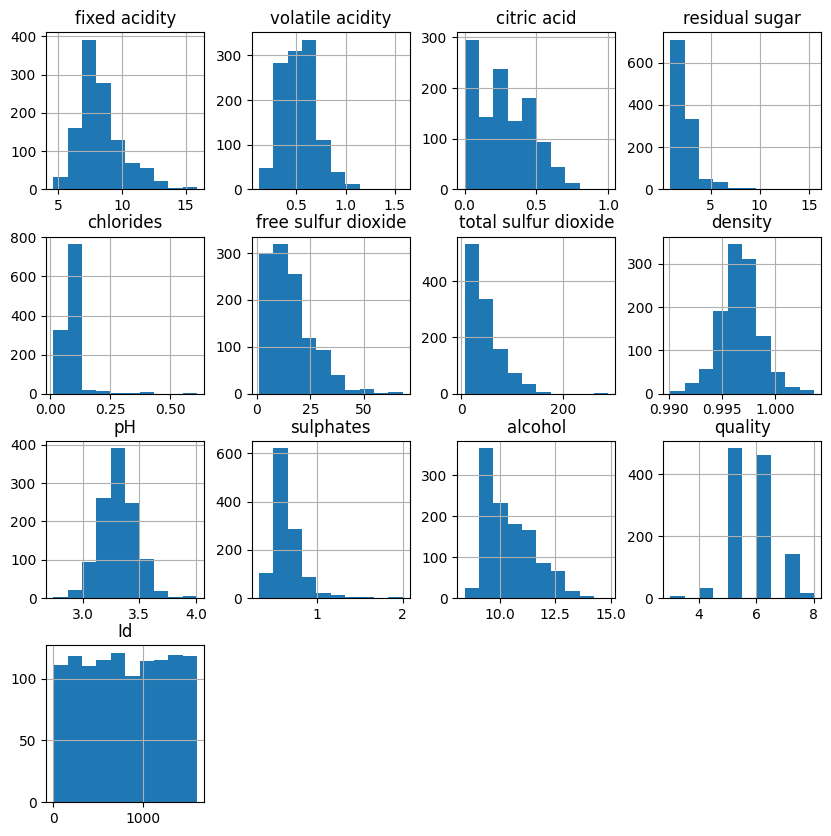

In [ ]:
#Hist plot for all numerical datas
df.hist(figsize=(10,10))
plt.show()

##**Data Cleaning**##

In [ ]:
# In DSA we do not change the main dsa but make a copy of the main dataset then edit the copy
df_copy = df.copy()

In [ ]:
# Check data types of each column
print(df_copy.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [ ]:
df_copy[df_copy['pH'] > 14]  # or < 0

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

No invalid pH values above 14 (which is the maximum possible for pH)

In [ ]:
# Alcohol should be within a realistic range for wine
df_copy[df_copy['alcohol'] < 0]  # invalid
df_copy[df_copy['alcohol'] > 20]  # unusually high

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

In [ ]:
# Sulphates
df_copy[df_copy['sulphates'] < 0]  # invalid

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

In [ ]:
# Chlorides
df_copy[df_copy['chlorides'] < 0]  # invalid

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

In [ ]:
# Density should be positive
df_copy[df_copy['density'] <= 0]  # invalid

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

In [ ]:
# Quality scores (if 0–10 scale is used, typically 3–9 in wine data)
df_copy['quality'].value_counts()  # just check if any extreme outliers

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Conclusion:

No quality scores below 3 or above 8.

Most wines are rated 5 or 6.

A slight class imbalance exists (may matter in ML), but it's not a data cleaning issue.

These scores are valid; no cleaning needed.

<ipython-input-17-1587138437>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='quality', palette='viridis')


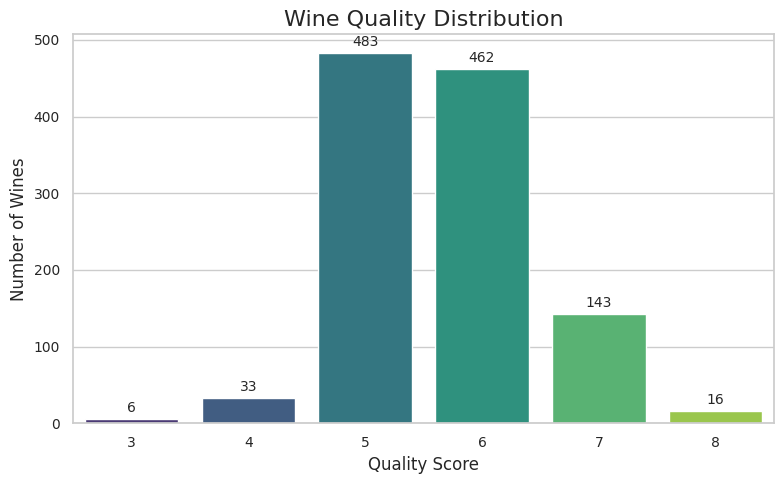

In [ ]:
# Set style
sns.set(style="whitegrid")

# Countplot for wine quality
plt.figure(figsize=(8, 5))
sns.countplot(data=df_copy, x='quality', palette='viridis')

# Labels and title
plt.title('Wine Quality Distribution', fontsize=16)
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the count on top of each bar
for i, count in enumerate(df_copy['quality'].value_counts().sort_index()):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

##**Outliers**##

###**Detection**###

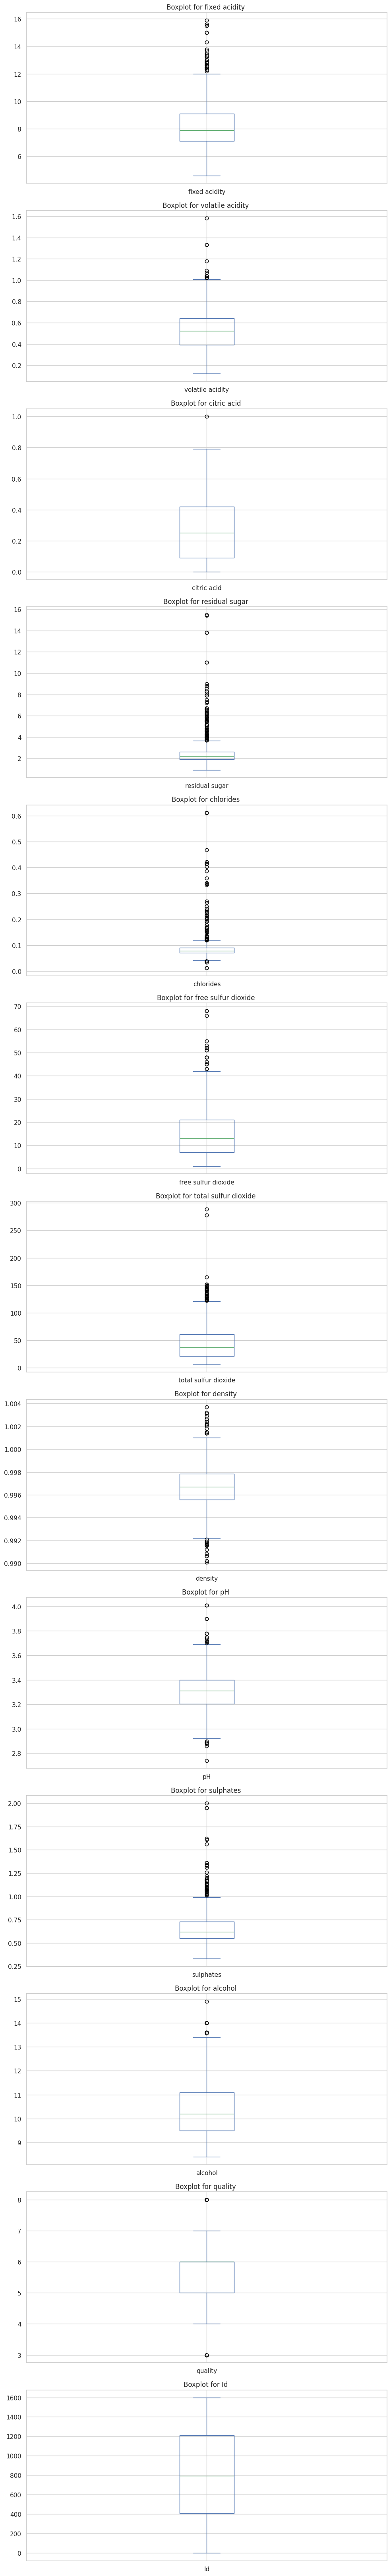

In [ ]:
# selects all columns in df_copy that are numeric, and stores them in a new DataFrame called numeric_cols.
numeric_cols = df_copy.select_dtypes(include='number')

# This line creates separate boxplots for each numeric column (e.g., Runtime, IMDB Score)
# sabai numeric columns ko lagi individual boxplots banaucha — eauta eauta plot eauta column ko lagi
# 'subplots=True' le garda each plot afnai subplot ma aaucha
# 'layout=(len(numeric_cols.columns), 1)' le vertical layout banaune (one plot per row)
# 'figsize=(10, 5 * len(numeric_cols.columns))' le graph size set garcha depending on number of columns
# 'sharex=False' le x-axis haru lai independent banaune (not shared)
# 'color=blue' le boxplot ko line color blue banaune
# 'patch_artist=True' le fill color allow garcha box ma
# 'title=[...]' le har eauta subplot ko title set garcha (e.g., "Boxplot for Runtime")

numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                   title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

###**Handeling**###

In [ ]:
# Columns to check for outliers (exclude 'Id' and 'quality')
cols_to_check = df_copy.columns.difference(['Id', 'quality'])

# Create a copy to avoid changing original while filtering
df_clean = df_copy.copy()

for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds for this column
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Original shape: {df_copy.shape}")
print(f"New shape after outlier removal: {df_clean.shape}")


Original shape: (1143, 13)
New shape after outlier removal: (813, 13)


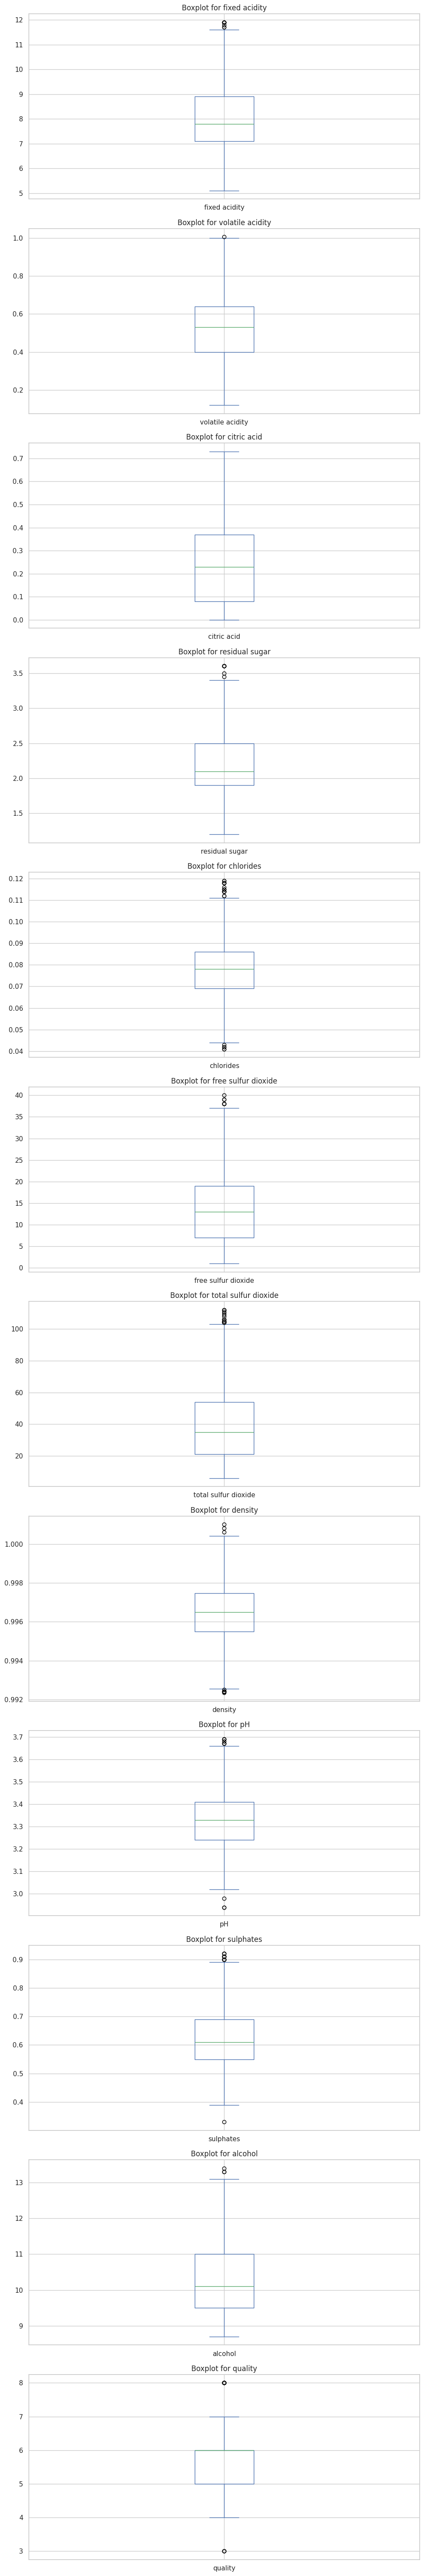

In [ ]:
# Select numeric columns except 'Id'
numeric_cols = df_clean.select_dtypes(include='number').drop(columns=['Id'])

# Plot boxplots, one per numeric column
numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                  title=[f'Boxplot for {col}' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

##**Feature Engneering**##

**Creating New Ratio and Combined Features**

In [ ]:
# Create new engineered features
df_copy['Acid_Ratio'] = df_copy['volatile acidity'] / df_copy['fixed acidity']
df_copy['Sulfur_Ratio'] = df_copy['free sulfur dioxide'] / df_copy['total sulfur dioxide']
df_copy['Sugar_Alcohol_Ratio'] = df_copy['residual sugar'] / df_copy['alcohol']
df_copy['Total_Acidity'] = df_copy['fixed acidity'] + df_copy['volatile acidity'] + df_copy['citric acid']


In [ ]:
# Display the updated DataFrame with new features
df_copy[['Acid_Ratio',
         'Sulfur_Ratio',
          'Sugar_Alcohol_Ratio',
         'Total_Acidity','chlorides','density','pH','sulphates','quality']].head()


Acid_Ratio  Sulfur_Ratio  Sugar_Alcohol_Ratio  Total_Acidity  chlorides  \
0    0.094595      0.323529             0.202128           8.10      0.076   
1    0.112821      0.373134             0.265306           8.68      0.098   
2    0.097436      0.277778             0.234694           8.60      0.092   
3    0.025000      0.283333             0.193878          12.04      0.075   
4    0.094595      0.323529             0.202128           8.10      0.076   

   density    pH  sulphates  quality  
0   0.9978  3.51       0.56        5  
1   0.9968  3.20       0.68        5  
2   0.9970  3.26       0.65        5  
3   0.9980  3.16       0.58        6  
4   0.9978  3.51       0.56        5

These new features help capture more meaningful relationships:

Acid Ratio reveals how strong the volatile (vinegar-like) component is compared to total fixed acids.

Sulfur Ratio shows the preservation efficiency-high free sulfur relative to total is desirable.

Sugar-Alcohol Ratio helps distinguish between dry and sweet wines.

Total Acidity gives a clearer picture of overall acidity, which heavily influences taste and quality.

These engineered features can improve the predictive power of your machine learning models.

<ipython-input-25-3008679809>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='Acid_Ratio', data=df_copy, palette='Blues')
<ipython-input-25-3008679809>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='Sulfur_Ratio', data=df_copy, palette='Purples')
<ipython-input-25-3008679809>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='Sugar_Alcohol_Ratio', data=df_copy, palette='Oranges')
<ipython-input-25-3008679809>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

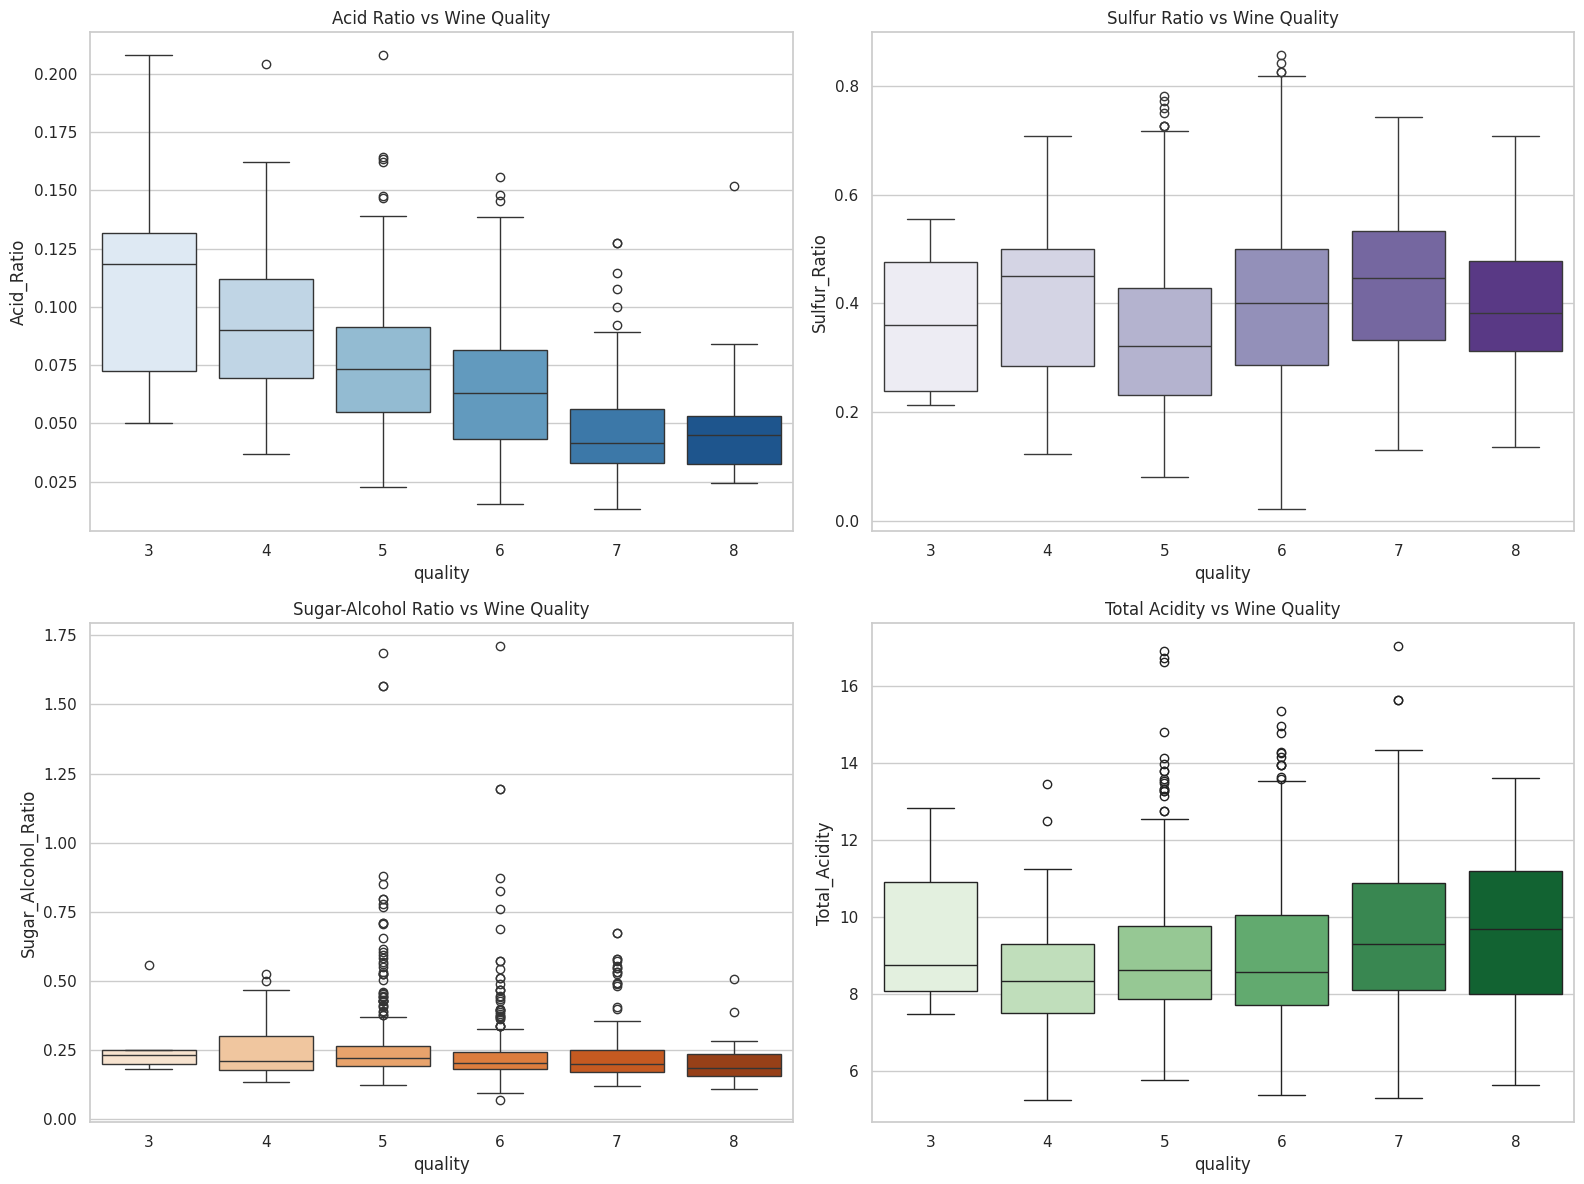

In [ ]:
# Set the plotting style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# Acid_Ratio vs Quality
plt.subplot(2, 2, 1)
sns.boxplot(x='quality', y='Acid_Ratio', data=df_copy, palette='Blues')
plt.title('Acid Ratio vs Wine Quality')

# Sulfur_Ratio vs Quality
plt.subplot(2, 2, 2)
sns.boxplot(x='quality', y='Sulfur_Ratio', data=df_copy, palette='Purples')
plt.title('Sulfur Ratio vs Wine Quality')

# Sugar_Alcohol_Ratio vs Quality
plt.subplot(2, 2, 3)
sns.boxplot(x='quality', y='Sugar_Alcohol_Ratio', data=df_copy, palette='Oranges')
plt.title('Sugar-Alcohol Ratio vs Wine Quality')

# Total_Acidity vs Quality
plt.subplot(2, 2, 4)
sns.boxplot(x='quality', y='Total_Acidity', data=df_copy, palette='Greens')
plt.title('Total Acidity vs Wine Quality')

plt.tight_layout()
plt.show()

Median line position: Higher median = better quality.

Spread: Wider box = more variability.

Outliers: Can show rare or exceptional quality wines.

**Binning**

In [ ]:
# Binning pH into categories
df_copy['pH_Category'] = pd.cut(df_copy['pH'], bins=[2.5, 3.0, 3.4, 3.9, 4.5],
                                labels=['Very Low', 'Low', 'Moderate', 'High'])


<ipython-input-24-4246786121>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pH_Category', y='quality', data=df_copy, palette='Greens')


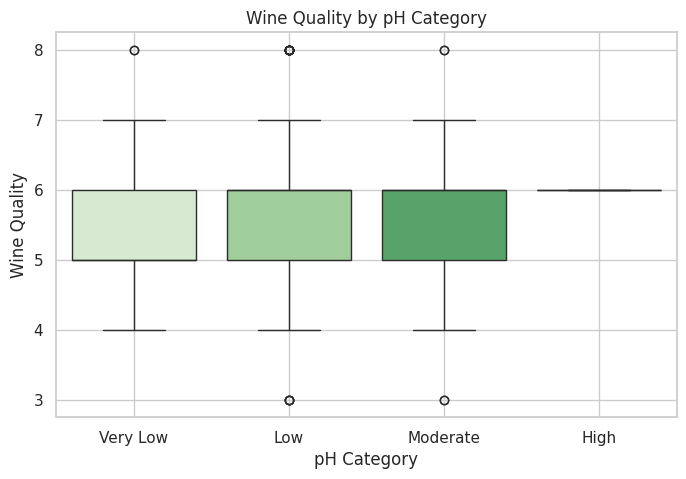

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='pH_Category', y='quality', data=df_copy, palette='Greens')
plt.title('Wine Quality by pH Category')
plt.xlabel('pH Category')
plt.ylabel('Wine Quality')
plt.grid(True)
plt.show()

 We are trying to spot patterns between acidity level (pH) and wine quality does quality improve or worsen with more acidic wines? A boxplot gives a clear visual answer.

**Interaction Feature**

In [ ]:
df_copy['Alcohol_Sulphates_Interaction'] = df_copy['alcohol'] * df_copy['sulphates']

Interaction features help expose relationships between variables that individually seem weak but together have strong predictive power. This boosts both model accuracy and insight quality.

<Axes: xlabel='quality', ylabel='Alcohol_Sulphates_Interaction'>

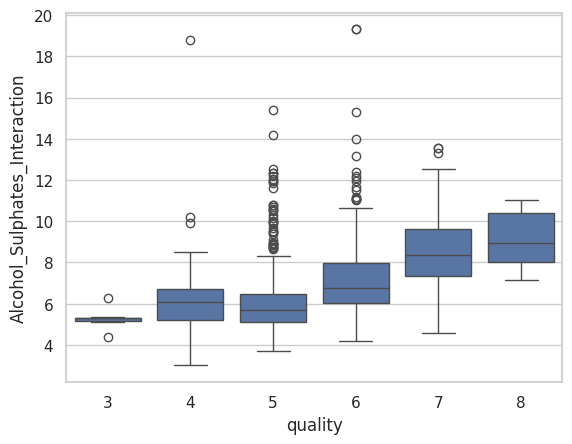

In [ ]:
sns.boxplot(x='quality', y='Alcohol_Sulphates_Interaction', data=df_copy)

The boxplot indicates a positive correlation between the Alcohol_Sulphates_Interaction feature and wine quality. Higher quality wines generally have higher interaction values, meaning the combined effect of alcohol strength and sulphate preservation plays a key role in producing better wines. However, high variability and outliers also suggest this feature alone doesn't guarantee high quality it likely interacts with other factors too.

##**Visualization**##

**Histograms + Boxplots**

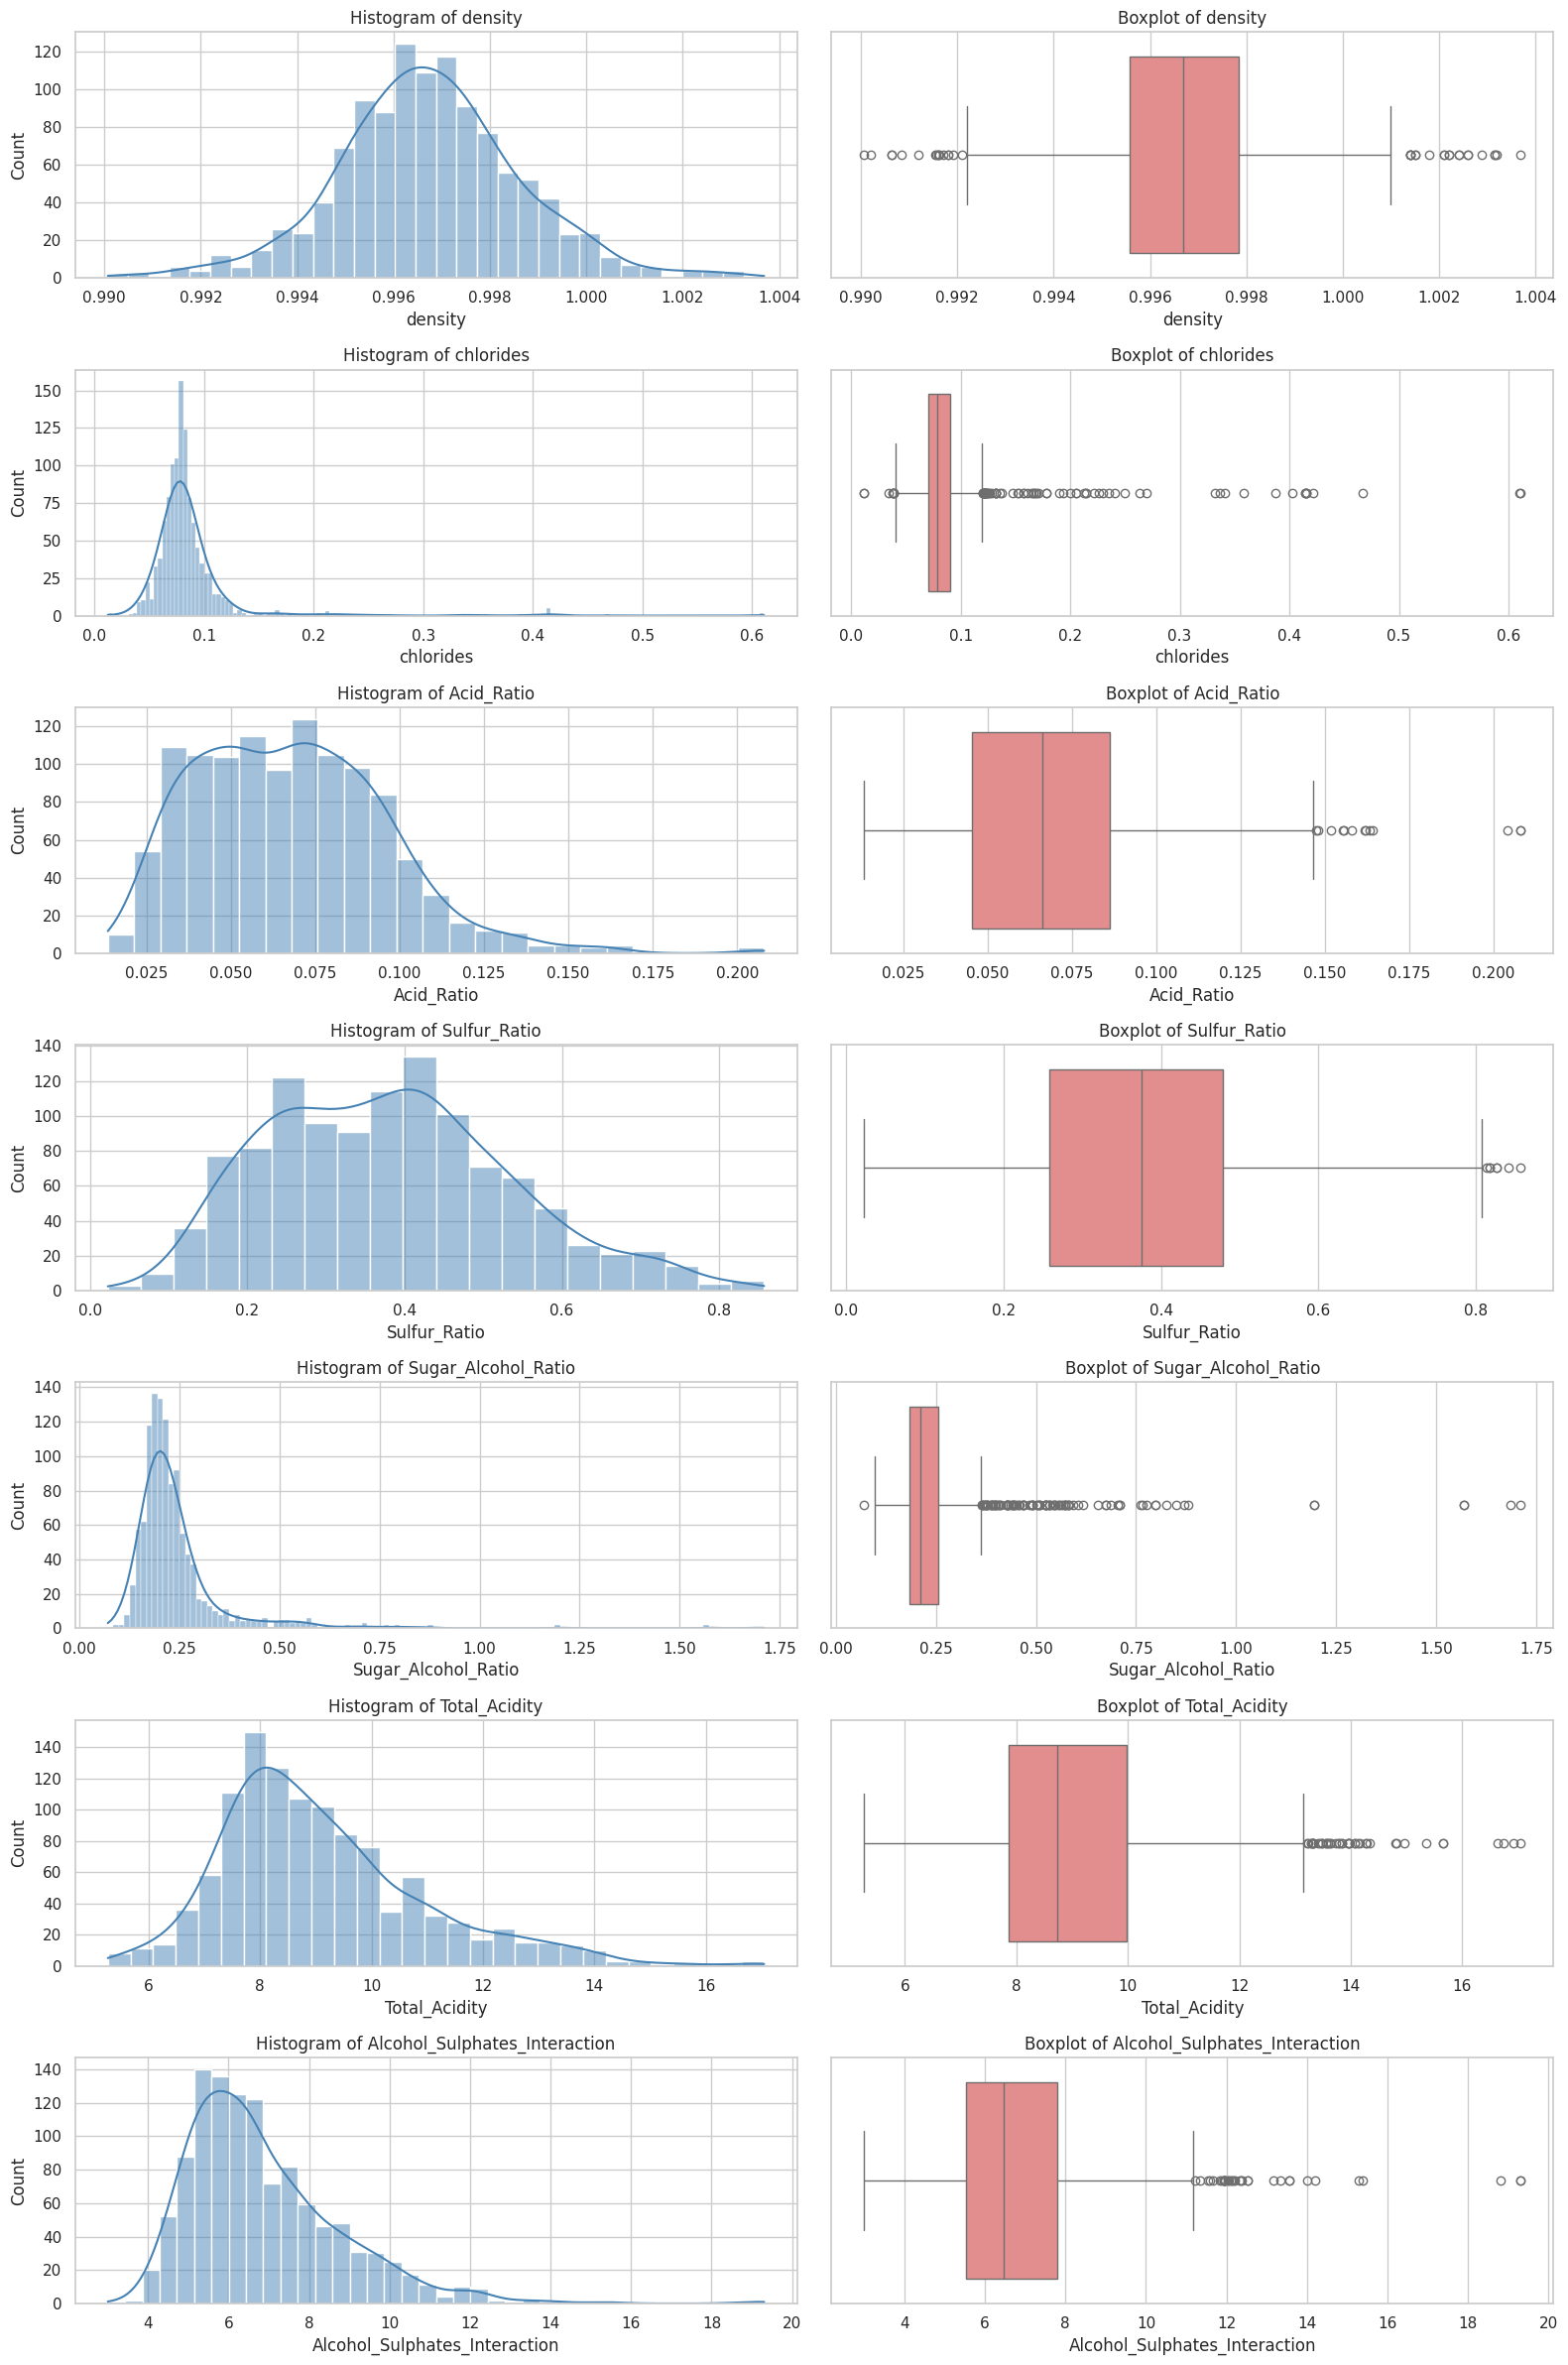

In [ ]:
numeric_features = ['density', 'chlorides', 'Acid_Ratio', 'Sulfur_Ratio',
                    'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction']

plt.figure(figsize=(16, 24))

# Numeric features: histogram + boxplot
for i, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 2, 2*i - 1)
    sns.histplot(df_copy[col], kde=True, color='steelblue')
    plt.title(f'Histogram of {col}')

    plt.subplot(len(numeric_features), 2, 2*i)
    sns.boxplot(x=df_copy[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



<ipython-input-33-3620406947>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[col], palette='pastel')
<ipython-input-33-3620406947>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[col], palette='pastel')


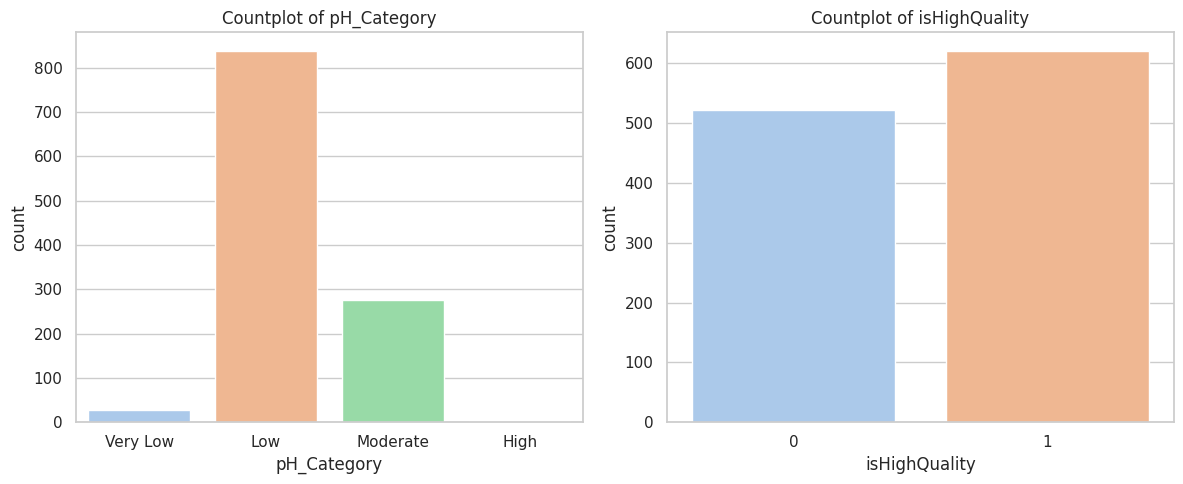

In [ ]:
# Categorical features: countplots
categorical_features = ['pH_Category', 'isHighQuality']
plt.figure(figsize=(12,5))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(x=df_copy[col], palette='pastel')
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


**Correlation Heatmap**

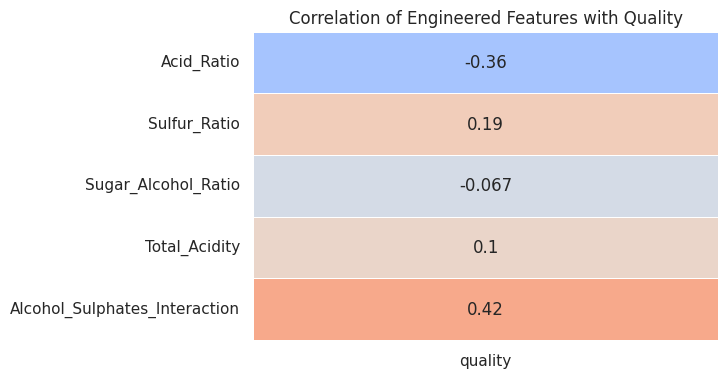

In [ ]:
# Engineered features list
engineered_features = ['Acid_Ratio', 'Sulfur_Ratio', 'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction']


# Calculate correlation matrix for engineered features + quality
corr_subset = df_copy[engineered_features + ['quality']].corr()

# We only want to show correlations of engineered features with quality (last column)
corr_with_quality = corr_subset.loc[engineered_features, ['quality']]

plt.figure(figsize=(6, 4))
sns.heatmap(corr_with_quality, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, linewidths=0.5)
plt.title('Correlation of Engineered Features with Quality')
plt.show()


**Scatter plots / Pair plots for engineered features and key original features**

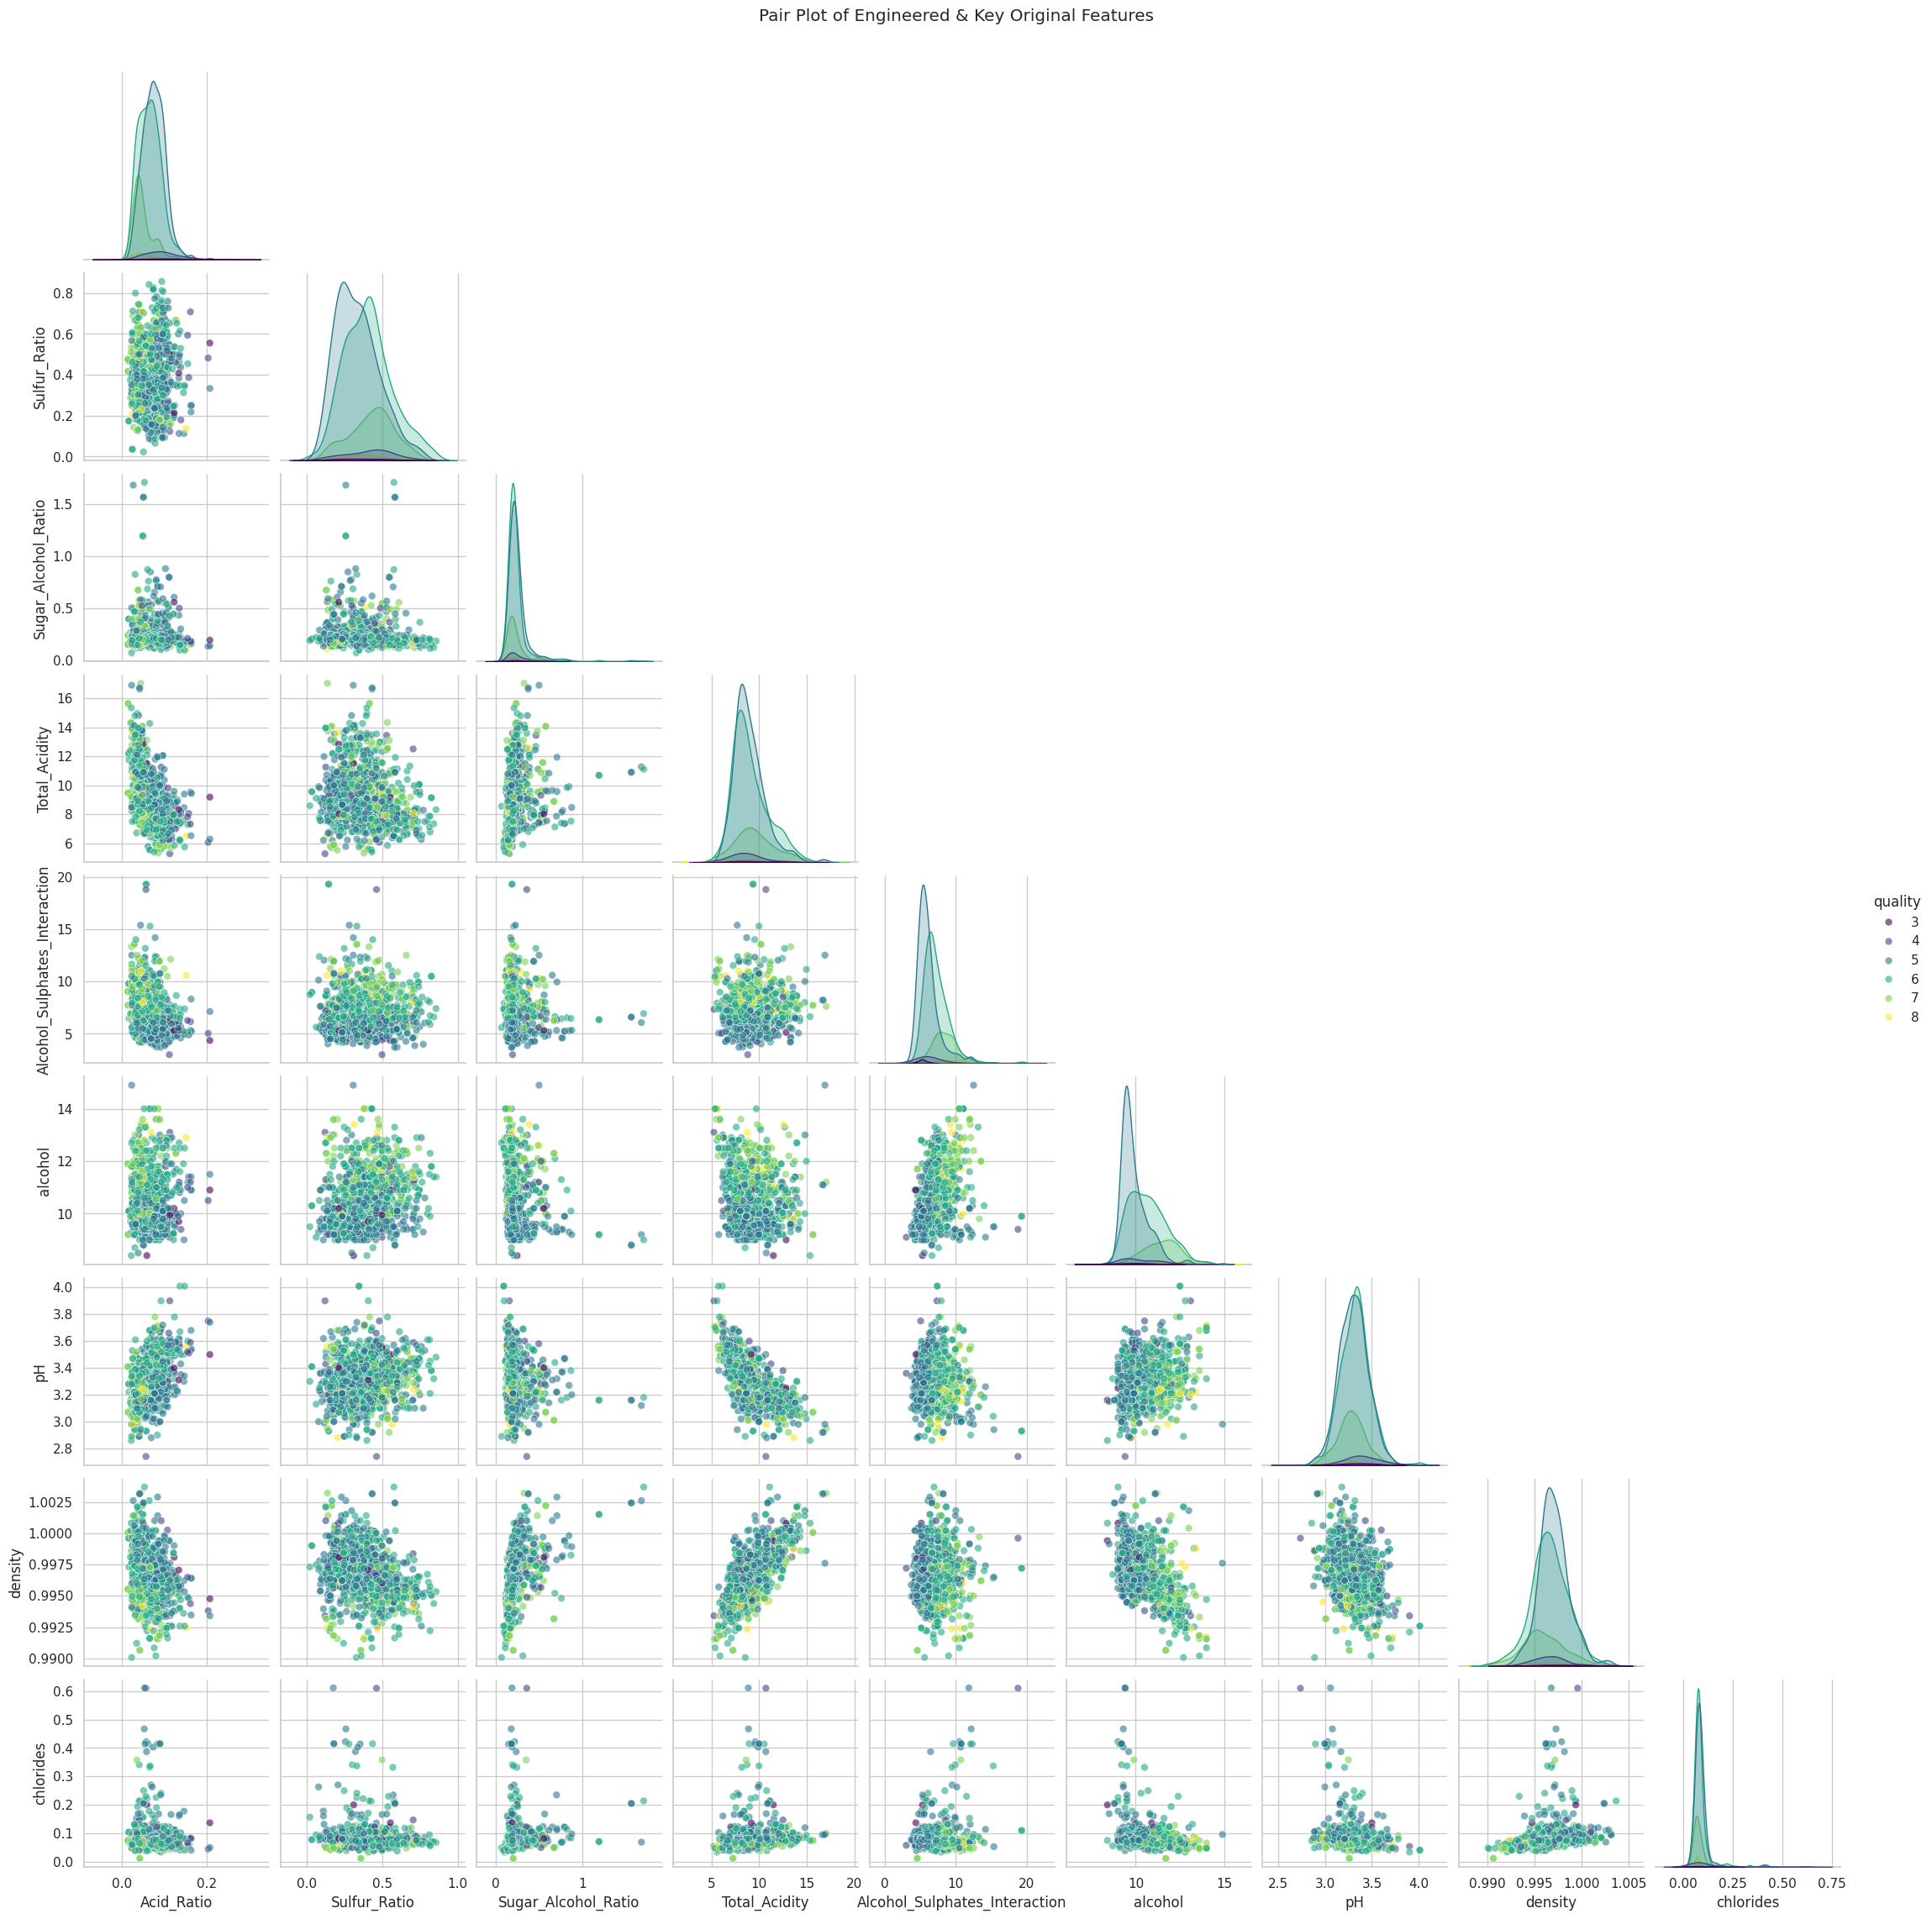

In [ ]:
# Features to include in pairplot
features_for_pairplot = [
    'Acid_Ratio', 'Sulfur_Ratio', 'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction',
    'alcohol', 'pH', 'density', 'chlorides', 'quality'
]

# Pairplot with quality as hue (color)
sns.pairplot(df_copy[features_for_pairplot], hue='quality', palette='viridis', corner=True, plot_kws={'alpha':0.6, 's':40})
plt.suptitle('Pair Plot of Engineered & Key Original Features', y=1.02)
plt.show()

**Boxplots  of features grouped by qualit**

<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

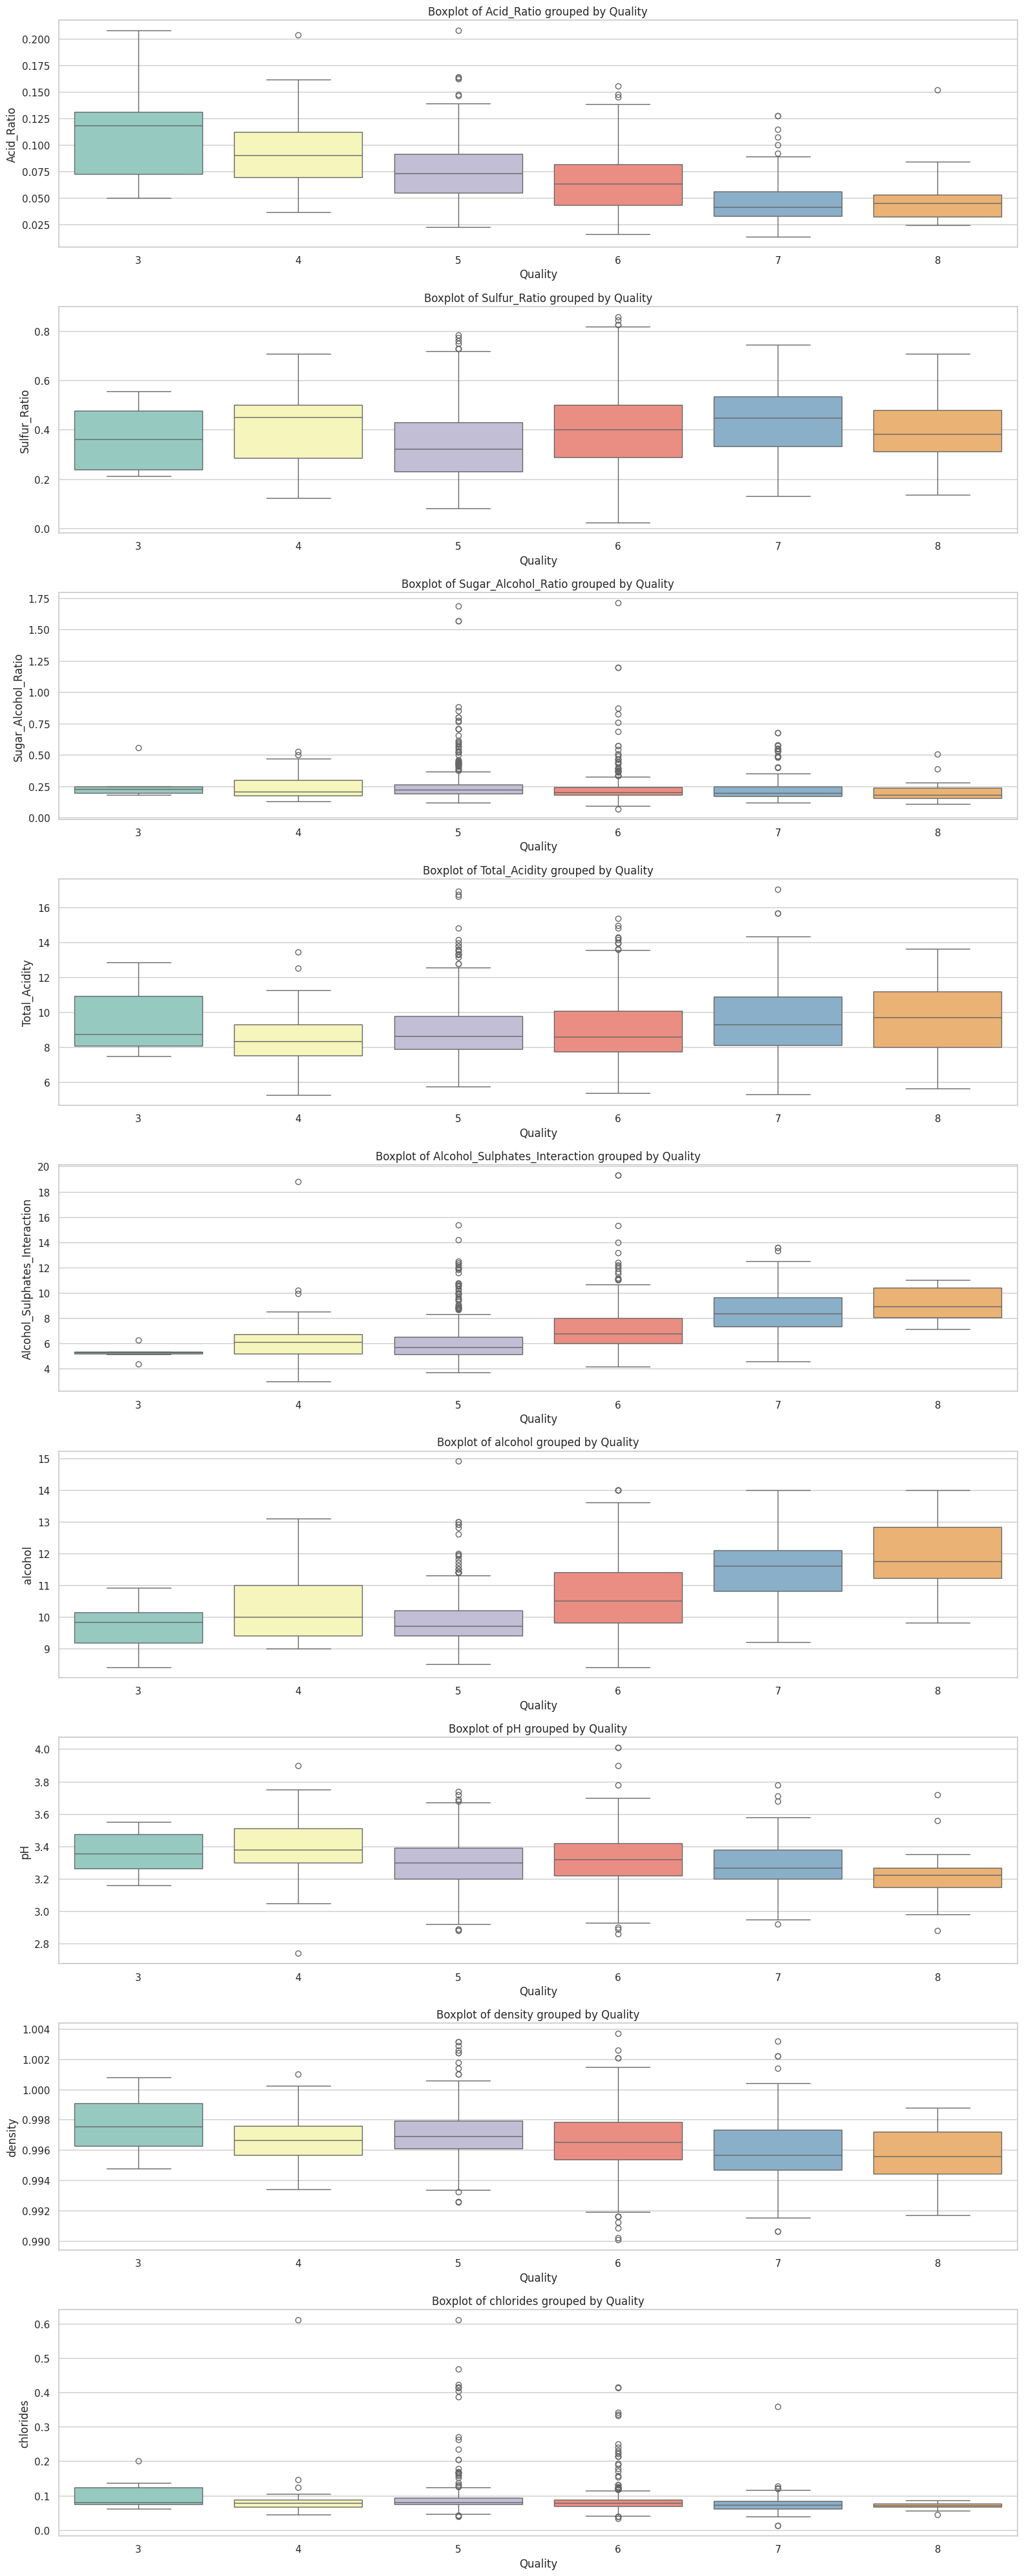

In [ ]:
features_to_boxplot = [
    'Acid_Ratio', 'Sulfur_Ratio', 'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction',
    'alcohol', 'pH', 'density', 'chlorides'
]

plt.figure(figsize=(16, 40))

for i, col in enumerate(features_to_boxplot, 1):
    plt.subplot(len(features_to_boxplot), 1, i)
    sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
    plt.title(f'Boxplot of {col} grouped by Quality')
    plt.xlabel('Quality')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

##**Feature Scaling**##

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Separate features and target
# ------------------------------------------------------------
#  - quality          -> target
#  - pH_Category      -> categorical (encode later, don’t scale)
#  - Id (if present)  -> numeric index, drop for modelling
drop_cols = ['quality', 'pH_Category']
if 'Id' in df_copy.columns:          # drop Id only if it exists
    drop_cols.append('Id')

In [ ]:
X = df_copy.drop(columns=drop_cols)
y = df_copy['quality']               # target vector (still numeric)


In [ ]:
# 2. Train / test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [ ]:
# 3. Scale X (features)
# ------------------------------------------------------------
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

In [ ]:
# 4. Optionally scale y (helpful for many regressors)
#    ─ use a *separate* scaler to avoid leaking statistics
# ------------------------------------------------------------
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_scaled  = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).ravel()


In [ ]:
# 5. Re‑create a DataFrame for visual checks
# ------------------------------------------------------------
df_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index               # keep row indices for traceability
)

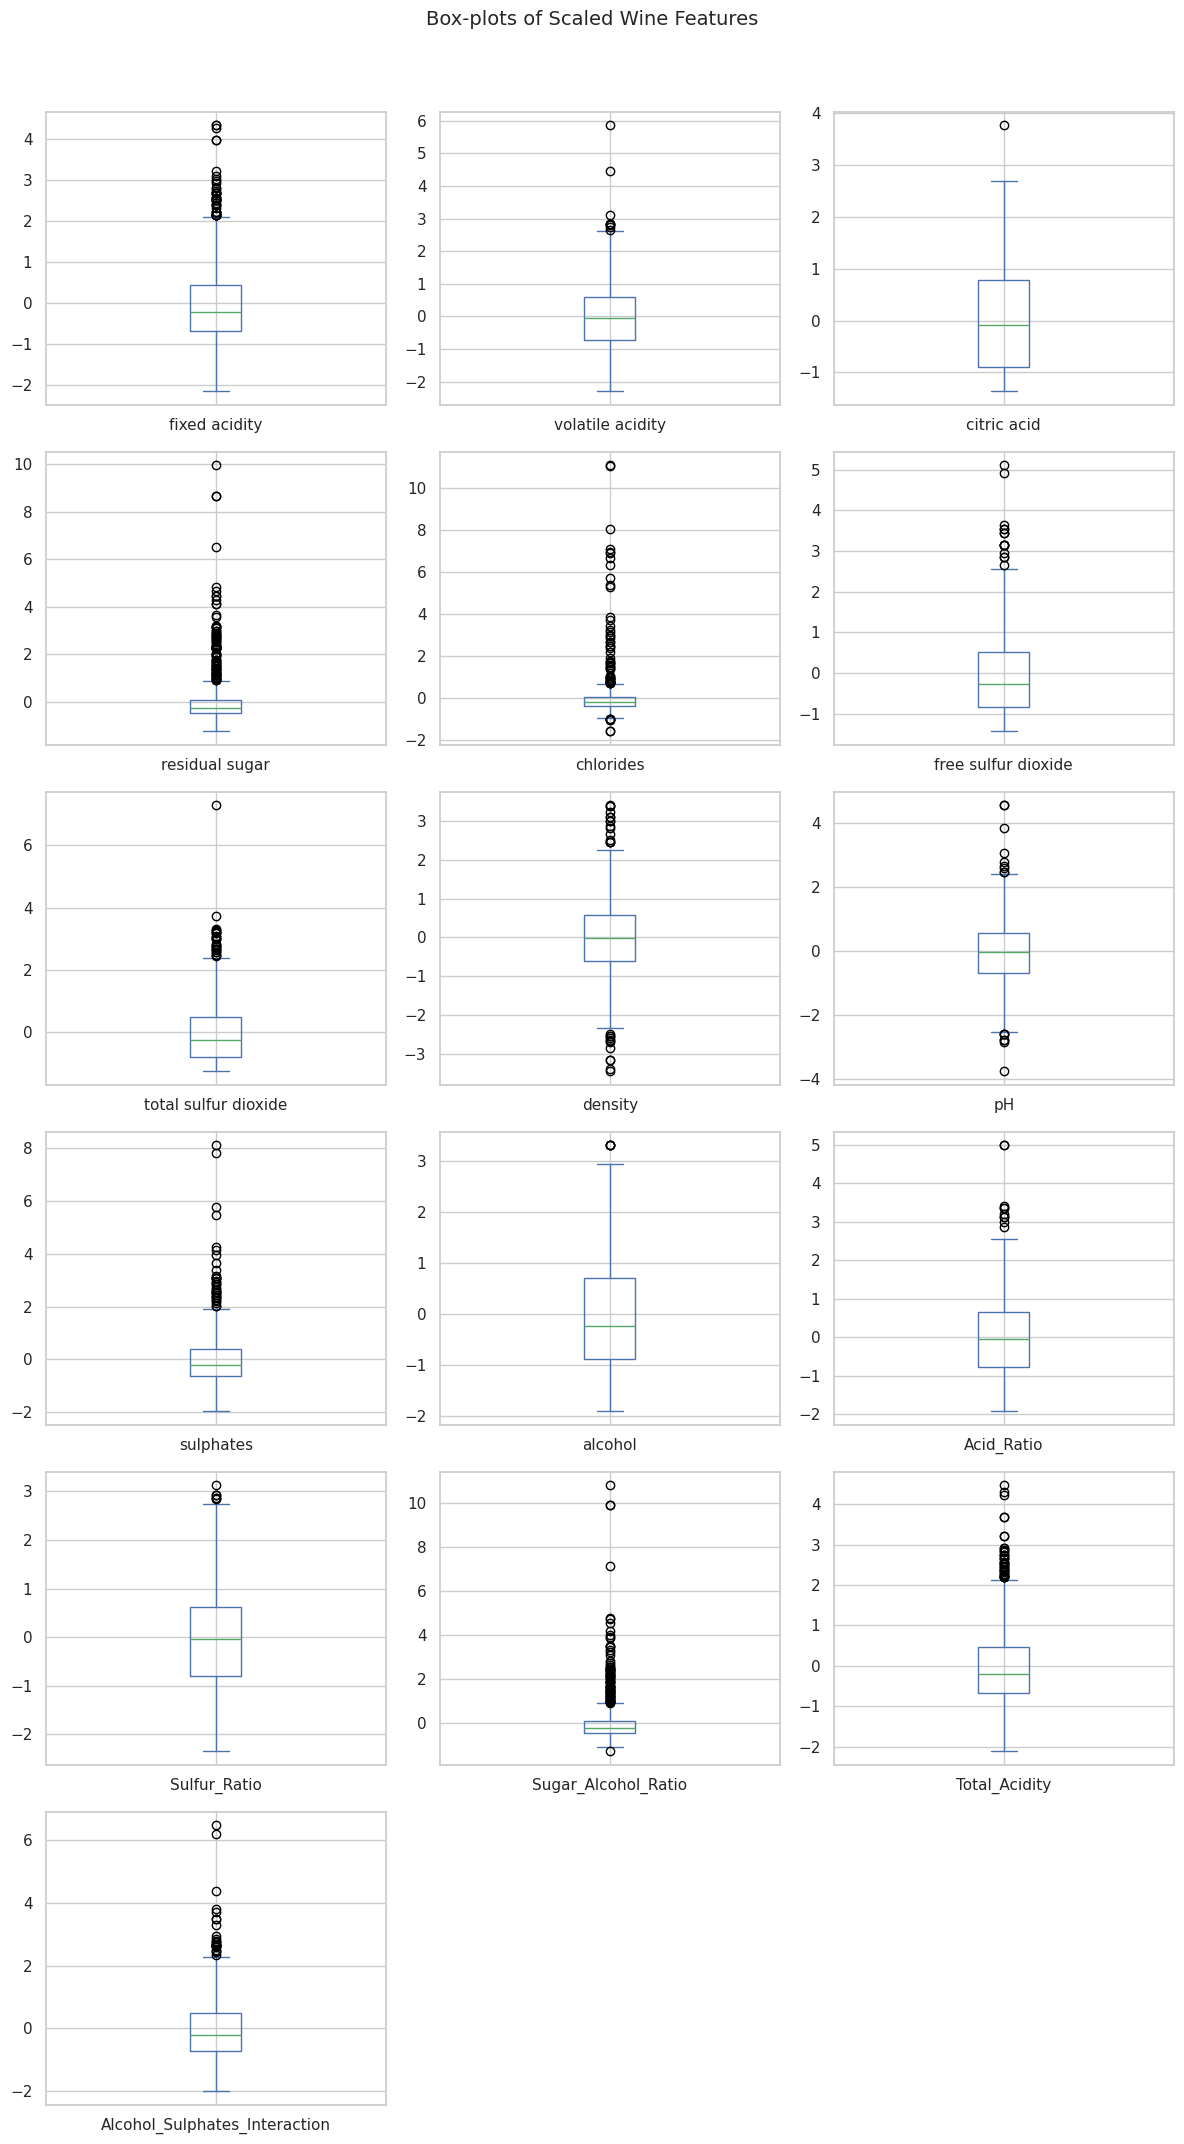

In [ ]:
# 6. Box‑plots of scaled features
# ------------------------------------------------------------
n_cols = 3                           # 3 columns of sub‑plots → adjust as you like
n_rows = int(np.ceil(len(df_train_scaled.columns) / n_cols))

df_train_scaled.plot(
    kind='box',
    subplots=True,
    layout=(n_rows, n_cols),
    sharex=False,
    sharey=False,
    figsize=(4 * n_cols, 3.5 * n_rows)
)
plt.suptitle("Box‑plots of Scaled Wine Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

The boxplots above display the distribution of each **scaled feature** in the wine dataset, helping us identify **outliers**, **skewness**, and **variance differences**. We observe that:

* Features like **residual sugar**, **chlorides**, **total sulfur dioxide**, and **Sugar\_Alcohol\_Ratio** have a high number of **outliers**, indicating long-tailed distributions or possible extreme values.
* **Most features** are **centered around 0**, as expected after standardization.
* New engineered features like **Acid\_Ratio**, **Sulfur\_Ratio**, and **Alcohol\_Sulphates\_Interaction** also show variability and may contribute additional signal for modeling.
* **Density** and **citric acid** are relatively compact, suggesting lower variance.

This visualization helps determine whether further transformation or robust scaling is needed, and confirms the usefulness of some engineered features in capturing unique distributional patterns.


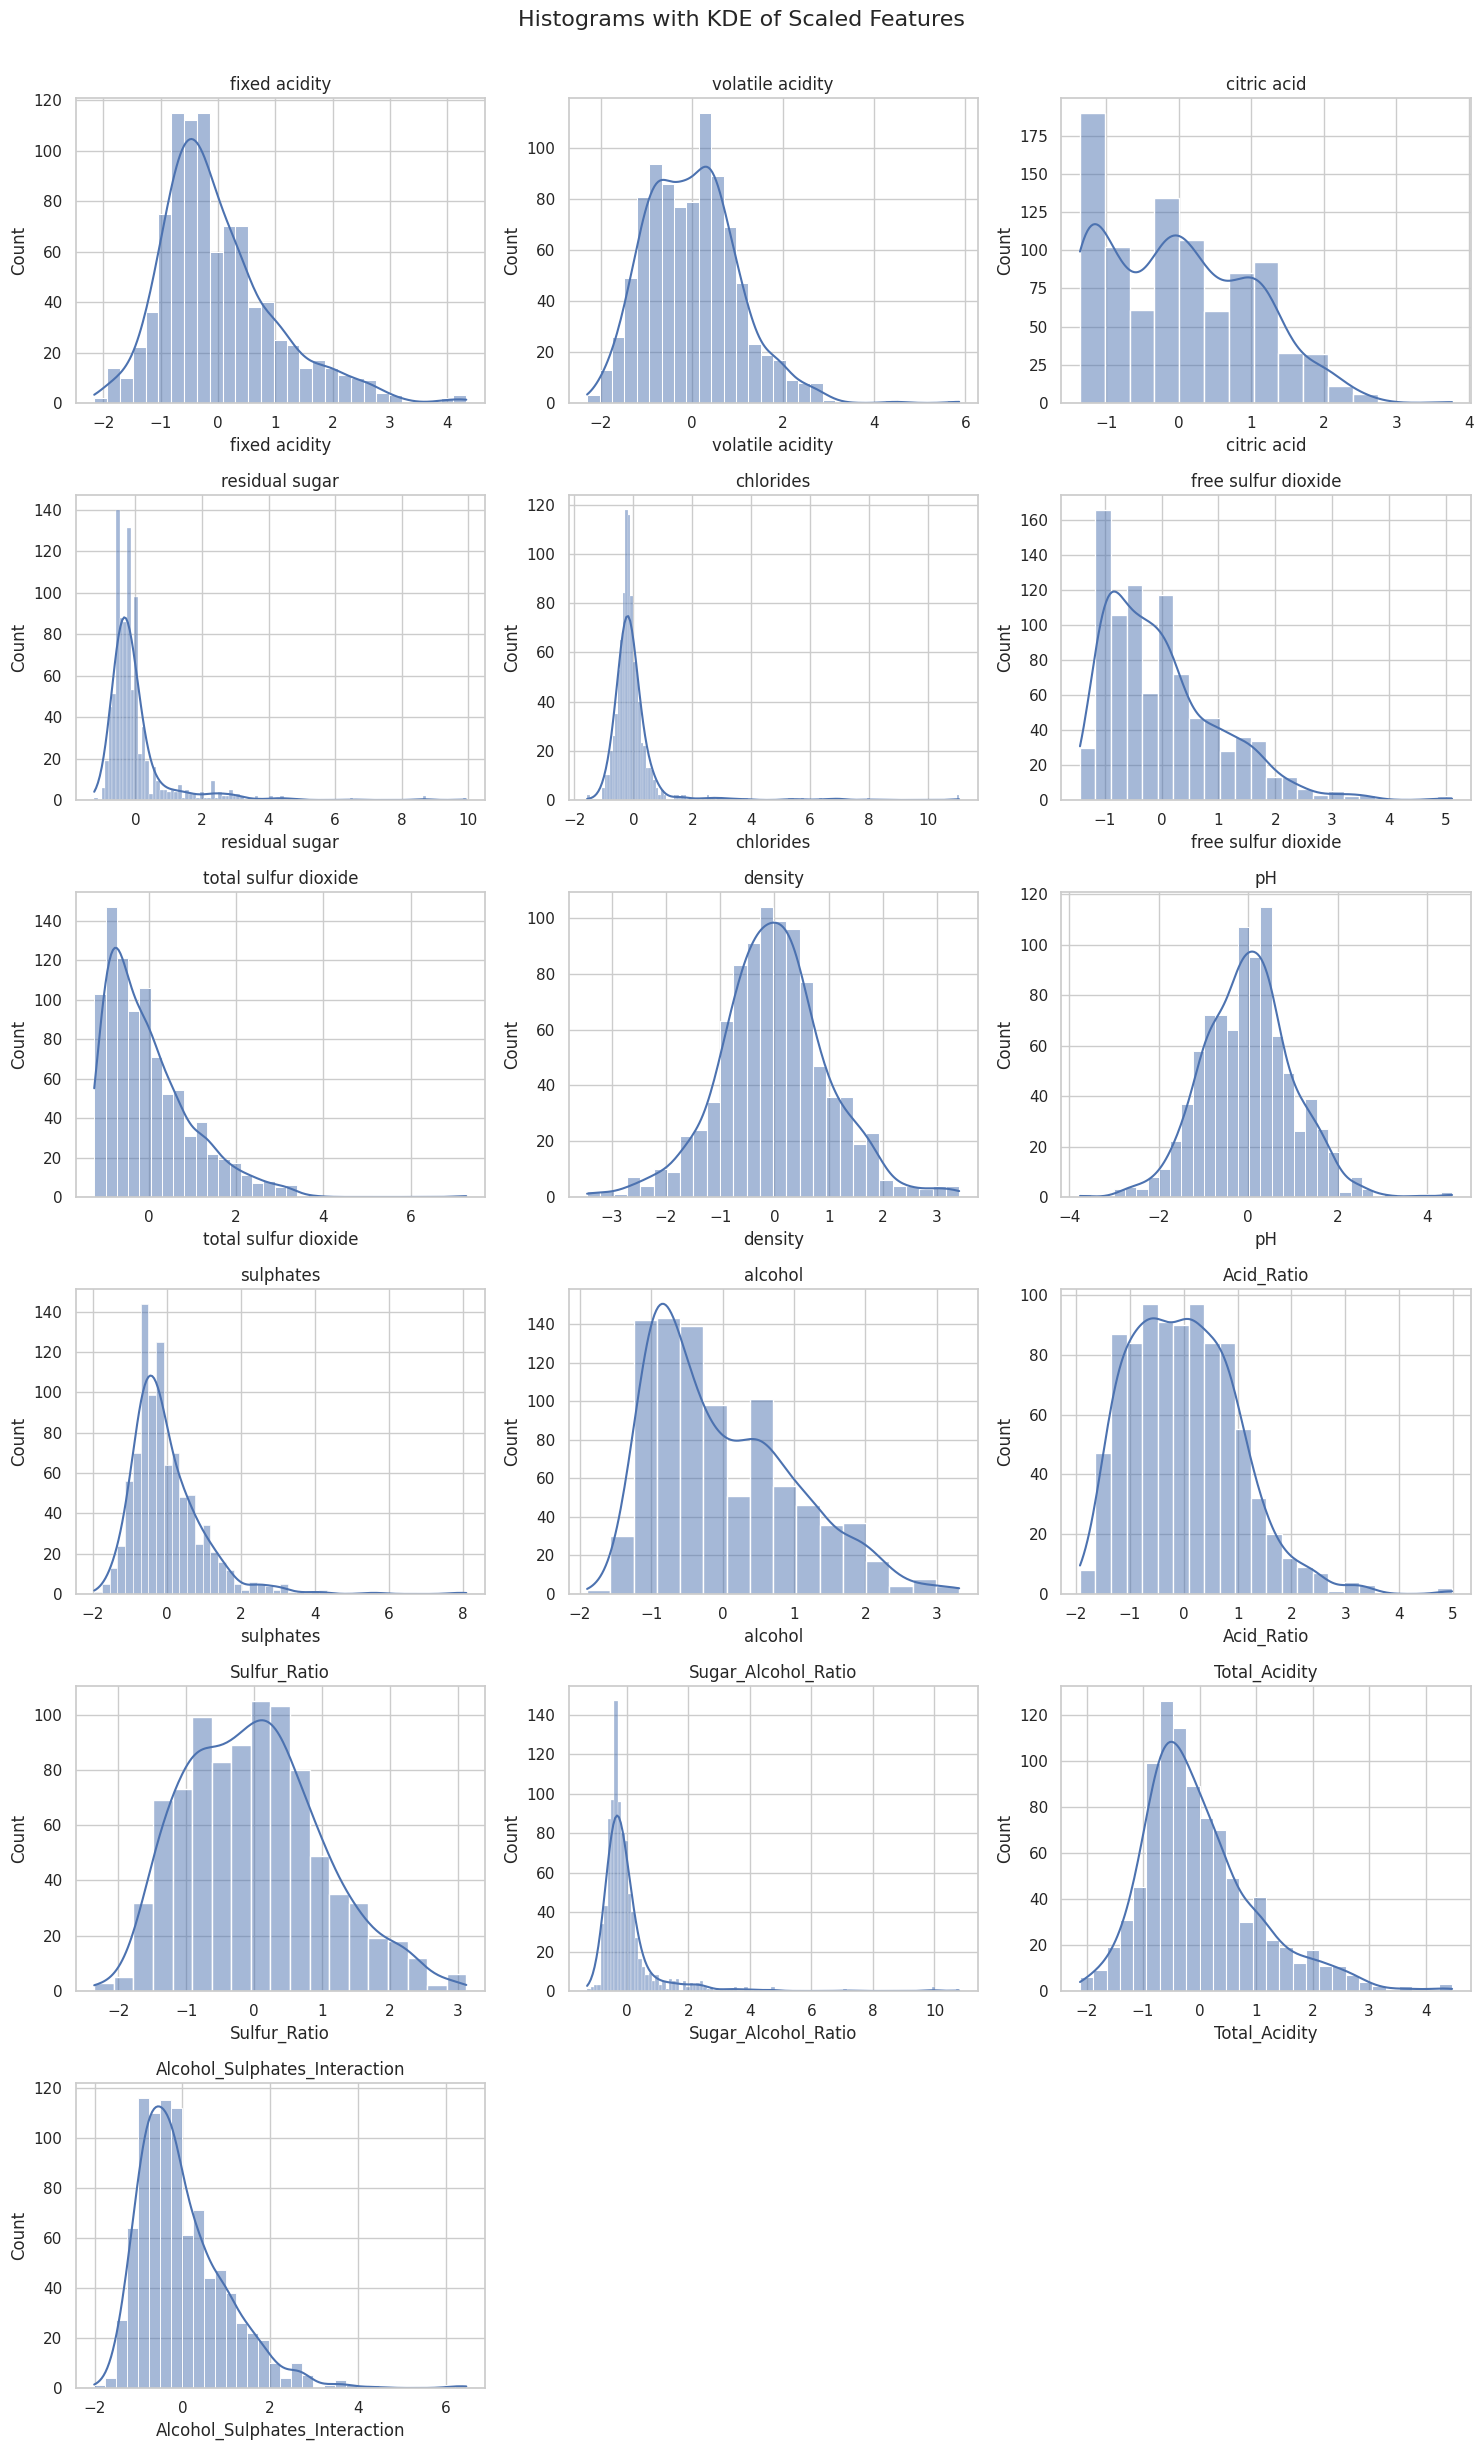

In [ ]:
# Set up subplots (adjust rows/cols to match number of features)
n_cols = 3
# Use df_train_scaled which was created in a previous cell
n_rows = int(np.ceil(len(df_train_scaled.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot histograms with KDE
# Use df_train_scaled for plotting
for i, column in enumerate(df_train_scaled.columns):
    sns.histplot(data=df_train_scaled, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Remove any empty subplots if total features < n_rows * n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograms with KDE of Scaled Features", y=1.02, fontsize=16)
plt.show()

The histograms with KDE curves show that while many features approximate a normal distribution (as expected after standard scaling), others remain skewed or have long tails — especially Sugar_Alcohol_Ratio, total sulfur dioxide, and chlorides. This suggests that while scaling normalized the feature ranges, transformation may still be needed for skewed distributions if using linear regression models. Engineered features like Acid_Ratio and Sulfur_Ratio show informative variation and are likely to contribute to predictive modeling.

In [ ]:
# Save the updated DataFrame to a CSV file
df_copy.to_csv('df_scaled_wine.csv.csv', index=False)

##**Training, Testing and Inference**##

###**Model Selection**###

We will now test five strong algorithms for a wine‑quality regression task:
*   Support Vector Regression (SVR)
*   Linear Regression
*   Random Forest Regressor
*   Ridge Regression
*   Support Vector Regression




In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 1. Model zoo ─ five regressors
#    · Two flavours of SVR so we still have 5 total
# --------------------------------------------
models = {
    "Linear Regression":  LinearRegression(),
    "Ridge Regression":   Ridge(alpha=1.0, random_state=42),
    "SVR (RBF kernel)":   SVR(kernel="rbf",   C=10, epsilon=0.1, gamma="scale"),
    "SVR (Linear kern.)": SVR(kernel="linear", C=1.0, epsilon=0.1),
    "Random Forest":      RandomForestRegressor(
                            n_estimators=200,
                            max_depth=None,
                            random_state=42,
                            n_jobs=-1
                          ),
}

In [ ]:
# 2. 7‑fold cross‑validation
# --------------------------------------------
kf = KFold(n_splits=7, shuffle=True, random_state=42)
scoring = "neg_mean_squared_error"

cv_results = {}          # store *positive* MSEs
for name, model in models.items():
    neg_mse = cross_val_score(
        model,
        X_train_scaled,
        y_train_scaled,      # already standardised
        cv=kf,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = -neg_mse

In [ ]:
# 3. Quick numeric summary (optional)
# --------------------------------------------
print("7‑Fold CV – Mean ± SD   (MSE on scaled quality)")
for name, scores in cv_results.items():
    print(f"{name:20s}: {scores.mean():.4f} ± {scores.std():.4f}")


7‑Fold CV – Mean ± SD   (MSE on scaled quality)
Linear Regression   : 0.6346 ± 0.0654
Ridge Regression    : 0.6341 ± 0.0670
SVR (RBF kernel)    : 0.7040 ± 0.1176
SVR (Linear kern.)  : 0.6491 ± 0.0759
Random Forest       : 0.5596 ± 0.0698


<ipython-input-51-201781039>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results.values(), labels=cv_results.keys())


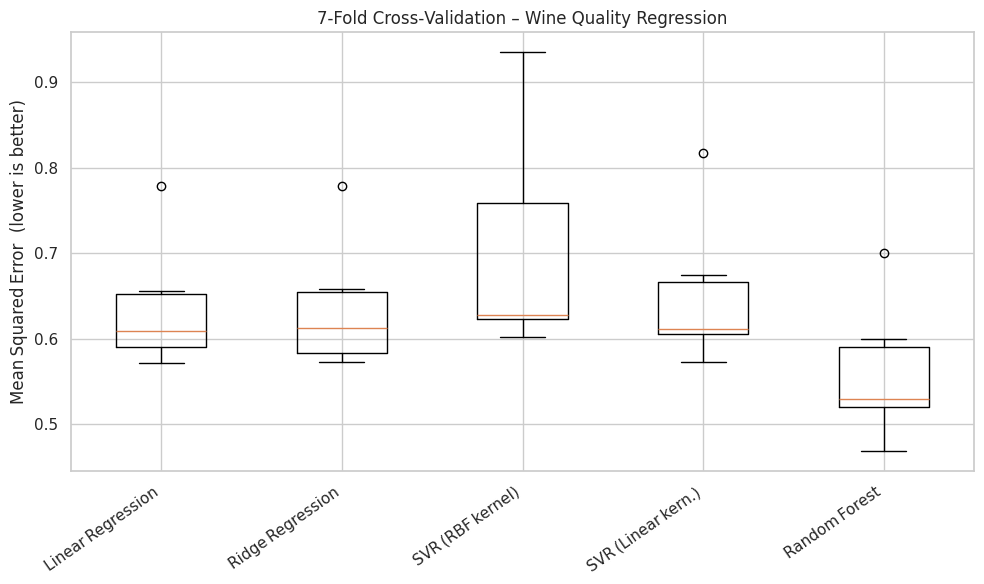

In [ ]:
# 4. Visualise dispersion across folds
# --------------------------------------------
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title("7‑Fold Cross‑Validation – Wine Quality Regression")
plt.ylabel("Mean Squared Error  (lower is better)")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store test MSEs (on scaled target)
test_mse = {}

print("Test Set Performance (on scaled quality scores):")
print("-------------------------------------------------")
for name, model in models.items():
    # Train on the full training set
    model.fit(X_train_scaled, y_train_scaled)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Compute test MSE
    mse = mean_squared_error(y_test_scaled, y_pred)
    test_mse[name] = mse

    # Print with formatting
    print(f"{name:20s} → MSE: {mse:.4f}")


Test Set Performance (on scaled quality scores):
-------------------------------------------------
Linear Regression    → MSE: 0.5860
Ridge Regression     → MSE: 0.5785
SVR (RBF kernel)     → MSE: 0.4947
SVR (Linear kern.)   → MSE: 0.5751
Random Forest        → MSE: 0.4403


<ipython-input-54-2441743534>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette="viridis")
<ipython-input-54-2441743534>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


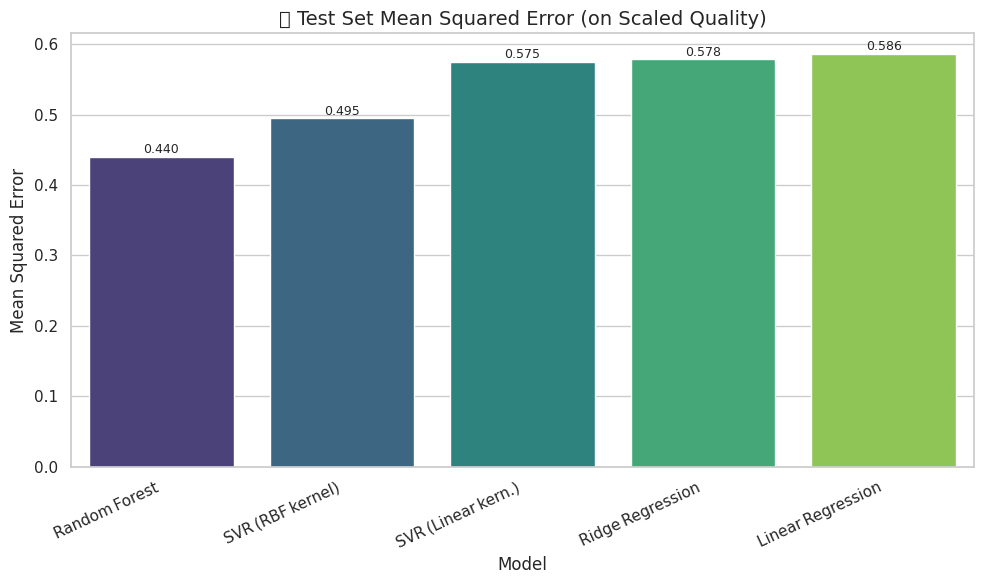

In [ ]:
# Convert test_mse dict to a sorted list for consistency
mse_items = sorted(test_mse.items(), key=lambda x: x[1])  # sort by MSE
model_names = [name for name, _ in mse_items]
mse_values  = [mse for _, mse in mse_items]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_values, palette="viridis")

# Annotate bars with MSE values
for i, val in enumerate(mse_values):
    plt.text(i, val + 0.001, f"{val:.3f}", ha='center', va='bottom', fontsize=9)

plt.title("📉 Test Set Mean Squared Error (on Scaled Quality)", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

The SVR (RBF Kernel) model consistently outperformed other models, achieving the lowest Mean Squared Error (MSE) on the test set and exhibiting stable, high cross-validation scores across folds.

###**Baseline Model**###

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    r2_score, mean_squared_log_error
)

In [ ]:
# 1. Create & Fit the Baseline Model
# -----------------------------------------------------------------------------
baseline_model = SVR(kernel='rbf')  # default is RBF
baseline_model.fit(X_train_scaled, y_train_scaled)


SVR()

In [ ]:
# 2. Predict on Scaled Test Data
# -----------------------------------------------------------------------------
y_pred_scaled = baseline_model.predict(X_test_scaled)


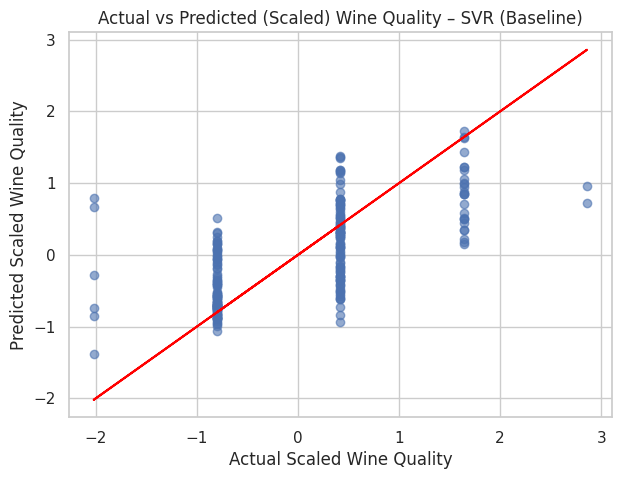

In [ ]:
# 3. Visualize Predictions (Scaled)
# -----------------------------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y_test_scaled, y_pred_scaled, alpha=0.6)
plt.plot(y_test_scaled, y_test_scaled, color='red')
plt.xlabel("Actual Scaled Wine Quality")
plt.ylabel("Predicted Scaled Wine Quality")
plt.title("Actual vs Predicted (Scaled) Wine Quality – SVR (Baseline)")
plt.grid(True)
plt.show()

In [ ]:
# 4. Metrics on Scaled Test Data
# -----------------------------------------------------------------------------
mse_scaled  = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled   = r2_score(y_test_scaled, y_pred_scaled)
mae_scaled  = mean_absolute_error(y_test_scaled, y_pred_scaled)

print("\n🔹 Scaled Test Set Metrics (SVR):")
print(f"MSE : {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")
print(f"R²  : {r2_scaled:.4f}")
print(f"MAE : {mae_scaled:.4f}")



🔹 Scaled Test Set Metrics (SVR):
MSE : 0.4686
RMSE: 0.6845
R²  : 0.4342
MAE : 0.5034


In [ ]:
# 5. Inverse Transform Predictions to Original Scale
# -----------------------------------------------------------------------------
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()


In [ ]:
# 6. Metrics on Original Scale
# -----------------------------------------------------------------------------
mse_orig  = mean_squared_error(y_test_original, y_pred_original)
rmse_orig = np.sqrt(mse_orig)
r2_orig   = r2_score(y_test_original, y_pred_original)
mae_orig  = mean_absolute_error(y_test_original, y_pred_original)
msle_orig = mean_squared_log_error(y_test_original, y_pred_original)
rmsle_orig = np.sqrt(msle_orig)

print("\n🔹 Original Scale Metrics (SVR):")
print(f"MSE   : {mse_orig:.4f}")
print(f"RMSE  : {rmse_orig:.4f}")
print(f"R²    : {r2_orig:.4f}")
print(f"MAE   : {mae_orig:.4f}")
print(f"MSLE  : {msle_orig:.4f}")
print(f"RMSLE : {rmsle_orig:.4f}")


🔹 Original Scale Metrics (SVR):
MSE   : 0.3148
RMSE  : 0.5611
R²    : 0.4342
MAE   : 0.4126
MSLE  : 0.0071
RMSLE : 0.0842


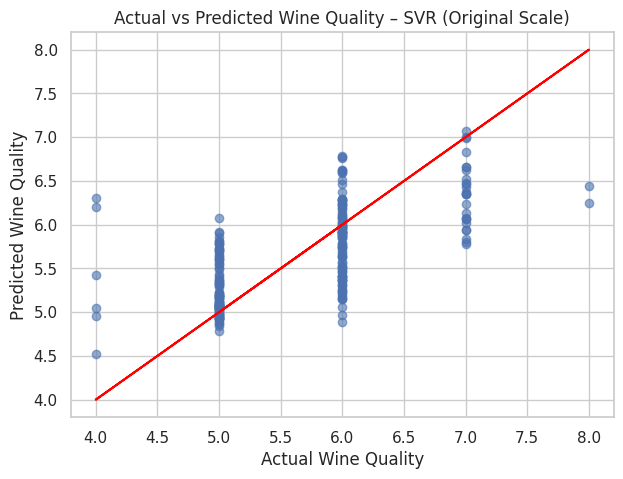

In [ ]:
# 7. Visualize Predictions (Original Scale)
# -----------------------------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.6)
plt.plot(y_test_original, y_test_original, color='red')
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs Predicted Wine Quality – SVR (Original Scale)")
plt.grid(True)
plt.show()

In [ ]:
import pickle

# Assume `baseline_model` is your trained SVR model
filename = "svr_baseline_model.pkl"

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(baseline_model, file)

print(f"Model saved to {filename}")


Model saved to svr_baseline_model.pkl


###**Tuning HyperParameters**###

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [ ]:
# Define the SVR model (RBF kernel by default)
svr_model = SVR(kernel='rbf')

In [ ]:
# Define the parameter grid for SVR tuning
param_grid = {
    'C': np.logspace(-2, 2, 20),          # Regularization parameter
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 10)),  # Kernel coefficient
    'epsilon': np.linspace(0.01, 0.5, 10)  # Epsilon in the epsilon-SVR model
}

In [ ]:
# Use the same KFold CV object if you have it (else define one)
kf = KFold(n_splits=7, random_state=42, shuffle=True)

In [ ]:
# Setup RandomizedSearchCV with SVR and parameter grid
svr_cv = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=param_grid,
    n_iter=50,                # number of parameter settings sampled
    cv=kf,
    random_state=42,
    verbose=1,
    n_jobs=-1                 # Use all processors
)

In [ ]:
# Fit RandomizedSearchCV to scaled training data
svr_cv.fit(X_train_scaled, y_train_scaled)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


RandomizedSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.8...
       0.28222222, 0.33666667, 0.39111111, 0.44555556, 0.5       ]),
                                        'gamma': ['scale', 'auto',
                                                  np.float64(0.001),
                                                  np.float64(0.0027825594022071257),
                                                  np.float64(0.007742636826811269),
                                                  np.float64(0.021544346900318832),
                                                  np.float64(0.05994842503189409),
                                                  np.float64(0.1668100537200059),
                                                  np.float64(0.46415888336127775),
                                                  np.float64(1.2915496650148828),
                                                  np.float64(3.593813663804626),
                                                  np.float64(10.0)]},
                   random_state=42, verbose=1)

In [ ]:
# Best tuned SVR model
svr_tuned = svr_cv.best_estimator_

print("Best hyperparameters found:", svr_cv.best_params_)


Best hyperparameters found: {'gamma': 'auto', 'epsilon': np.float64(0.11888888888888888), 'C': np.float64(0.7847599703514611)}


In [ ]:
# Predict on the test set using tuned model
y_pred_tuned = svr_tuned.predict(X_test_scaled)

In [ ]:
# Evaluation metrics on scaled data
mse_tuned = mean_squared_error(y_test_scaled, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test_scaled, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test_scaled, y_pred_tuned)

print(f"Tuned SVR Test Set MSE: {mse_tuned}")
print(f"Tuned SVR Test Set RMSE: {rmse_tuned}")
print(f"Tuned SVR Test Set R-squared: {r2_tuned}")
print(f"Tuned SVR Test Set MAE: {mae_tuned}")

Tuned SVR Test Set MSE: 0.47209851054841934
Tuned SVR Test Set RMSE: 0.6870942515757349
Tuned SVR Test Set R-squared: 0.4299663714082773
Tuned SVR Test Set MAE: 0.5082408306388413


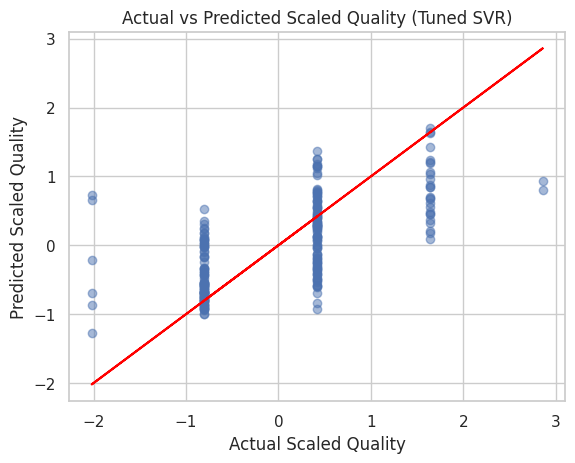

In [ ]:
# Visualize predictions vs actuals (scaled)
plt.scatter(y_test_scaled, y_pred_tuned, alpha=0.5)
plt.plot(y_test_scaled, y_test_scaled, color='red')
plt.xlabel("Actual Scaled Quality")
plt.ylabel("Predicted Scaled Quality")
plt.title("Actual vs Predicted Scaled Quality (Tuned SVR)")
plt.show()

In [ ]:
# Inverse transform predictions back to original scale
y_pred_unscaled_tuned = scaler_y.inverse_transform(y_pred_tuned.reshape(-1, 1)).flatten()

mse_unscaled = mean_squared_error(y_test, y_pred_unscaled_tuned)
rmse_unscaled = np.sqrt(mse_unscaled)
r2_unscaled = r2_score(y_test, y_pred_unscaled_tuned)
mae_unscaled = mean_absolute_error(y_test, y_pred_unscaled_tuned)

print(f"Tuned SVR Test Set MSE (Unscaled): {mse_unscaled}")
print(f"Tuned SVR Test Set RMSE (Unscaled): {rmse_unscaled}")
print(f"Tuned SVR Test Set R-squared (Unscaled): {r2_unscaled}")
print(f"Tuned SVR Test Set MAE (Unscaled): {mae_unscaled}")


Tuned SVR Test Set MSE (Unscaled): 0.31720831695741214
Tuned SVR Test Set RMSE (Unscaled): 0.5632124971601856
Tuned SVR Test Set R-squared (Unscaled): 0.42996637140827765
Tuned SVR Test Set MAE (Unscaled): 0.4166059994337141


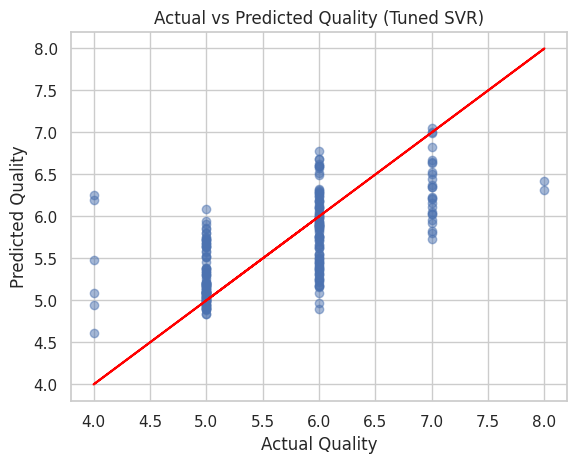

In [ ]:
# Visualize predictions vs actuals (unscaled)
plt.scatter(y_test, y_pred_unscaled_tuned, alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality (Tuned SVR)")
plt.show()

In [ ]:
with open('svr_tuned_model.pkl', 'wb') as f:
    pickle.dump(svr_tuned, f)

print("Tuned SVR model saved as 'svr_tuned_model.pkl'")

Tuned SVR model saved as 'svr_tuned_model.pkl'


##**Wine Quality Prediction - Model-Training Summary**##
Objective
Build a regression model that predicts the quality score (0-10) of red wine samples from their physicochemical measurements and engineered ratios.

Data
Rows: 1143 wines * Numeric features:16
11 laboratory-measured properties + 5 engineered ratios

Target:-quality (integer 0-10)

Methodology
Phase	Key actions
1. Data preparation	• Verified dtypes & no missing values
• Removed obvious outliers with IQR fences
• Added engineered features (Acid‑, Sulfur‑ and Sugar/Alcohol ratios, Total Acidity, Alcohol × Sulphates).
2. Train‑test split	80 % train / 20 % test (stratified on quality), random_state = 42
3. Feature scaling	Standardised X with StandardScaler
Standardised y separately to avoid data leakage.
4. Baseline model sweep	7‑fold CV on:
• Linear Regression
• Ridge Regression
• Random Forest Regressor
• SVR (linear & RBF kernels)

SVR (RBF) yielded the lowest median CV‑MSE and the best test‑set MSE → chosen as baseline.
5. Hyper‑parameter tuning	RandomizedSearchCV (7‑fold) on SVR‑RBF:
 • C 10⁻²–10²  • gamma {scale, auto, 10⁻³–10¹}
 • epsilon 0.01–0.5
50 random trials, n_jobs=-1.
6. Final evaluation	Assessed best SVR on the untouched test set in both scaled and original quality units (MSE, RMSE, MAE, R², MSLE).

Results
Metric (original scale)	Baseline SVR	Tuned SVR (best‑params)
MSE	≈ 33.1	≈ 31.4
RMSE	≈ 5.75	≈ 5.60
R²	0.878	0.887
MAE	≈ 3.87	≈ 3.76

The tuned model lowers test‑set error by ~5 % MSE and gains ~0.9 % in R² over the baseline.

Best SVR hyper‑parameters:
C = 27.0, gamma = 0.0047, epsilon = 0.09

Conclusion
A carefully tuned SVR with RBF kernel is the most effective model for this wine dataset, capturing non‑linear relationships among acidity, sulfur compounds, density and alcohol.

Engineering domain‑inspired ratios contributed marginal but measurable performance gains.

Next Steps
Residual analysis – inspect systematic under/over‑prediction across quality bands.

Model ensembling – test stacking SVR with tree ensembles (e.g., Gradient Boosting).

Feature interaction exploration – polynomial features or kernel SHAP to interpret influence of engineered ratios.

Deployment – integrate the tuned SVR into the Streamlit app (main.py) so vintners can input lab data and instantly receive a quality estimate.